# Sets Up

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import genextreme  # Validate the correctness of the results

# 2. Implement your own GEV PDF and CDF functions (10 points)

Based on WIKIPEDIA: https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution.

The GEV PDF is as follows:
$$
\
F_{pdf}(x | \xi, \mu, \sigma) = 
\begin{cases} 
\frac{1}{\sigma} \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-\frac{1}{\xi} - 1} \exp\left(-\left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-\frac{1}{\xi}}\right), & \text{if} \ \xi \neq 0 \\
\frac{1}{\sigma} \exp\left(-\frac{x - \mu}{\sigma}\right)^{{\xi} + 1} \exp\left(-\exp\left(-\frac{x - \mu}{\sigma}\right)\right), & \text{if}  \xi = 0
\end{cases}
$$


The GEV CDF is as follows:
$$
\
F_{cdf}(x | \xi, \mu, \sigma) = 
\begin{cases}
    \exp\left(-\left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-\frac{1}{\xi}}\right), & \text{if } \xi \neq 0 \\
    \exp\left(-\exp\left(-\frac{x - \mu}{\sigma}\right)\right), & \text{if } \xi = 0 
\end{cases}
\
$$


Where:
- $x $ is The array to be calculated,
- $\xi $ is the shape parameter,
- $\mu $ is the location parameter,
- $\sigma $ is the scale parameter.


#### In the notebook/live-editor created above, write two functions and verify their correctness: a function for the GEV PDF and a function for the GEV CDF.

In [2]:

def gev_pdf(x, mu, sigma, xi):
    """ 
    Calculate the GEV PDF
        Parameters:
    x : array-like, Values at which to evaluate the CDF.
    mu : float, Location parameter.
    sigma : float, Scale parameter.
    xi : float, Shape parameter .
    
    Returns:
    pdf : array-like
        Values of the GEV PDF evaluated at the given x points.
    """
    # Make sure sigma is positive
    assert sigma > 0, "sigma must be positive"
    
    # Calculate the value of t(x)
    t = 1 + xi * (x-mu)/sigma
    
    # Check if t(x) > 0, otherwise PDF is 0
    valid = t > 0
    pdf = np.zeros_like(x)
    
    if xi != 0:
        pdf[valid] = (1/sigma) * (t[valid]**(-1/xi-1)) * np.exp(-t[valid] ** (-1/xi))
    else:  
        pdf[valid] = (1/sigma) * (np.exp(-(x[valid]-mu)/sigma)**(xi+1)) * np.exp(-np.exp(-(x[valid]-mu)/sigma))
    
    return pdf

def gev_cdf(x, mu, sigma, xi):
    """ 
    Calculate the GEV CDF 
            Parameters:
    x : array-like, Values at which to evaluate the CDF.
    mu : float, Location parameter.
    sigma : float, Scale parameter.
    xi : float, Shape parameter .
    
    Returns:
    cdf : array-like
        Values of the GEV CDF evaluated at the given x points.
    """
    # Make sure sigma is positive
    assert sigma > 0, "sigma must be positive"
    
    # Calculate the value of t(x)
    t = 1 + xi * (x - mu) / sigma
    
    # Check if t(x) > 0, otherwise CDF is 0
    valid = t > 0

    if xi == 0: # When xi == 0, that is, the limiting distribution
        cdf = np.zeros_like(x)
        cdf[valid] = np.exp(-np.exp(-(x[valid] - mu) / sigma))
    
    # Classification discussion on the positive and negative cases of xi
    # When I first tried it without classification, it caused some unreasonable situations, 
    # for example, the CDF reached 1 and then quickly dropped to 0
    elif xi > 0: 
        cdf = np.zeros_like(x)
        cdf[valid] = np.exp(-t[valid] ** (-1 / xi))
        
    elif xi < 0:
        cdf = np.ones_like(x) # This is the only difference from above where xi>0
        cdf[valid] = np.exp(-t[valid] ** (-1 / xi))
    
    return cdf

#### Make some plots of GEV PDFs and CDFs using your functions.

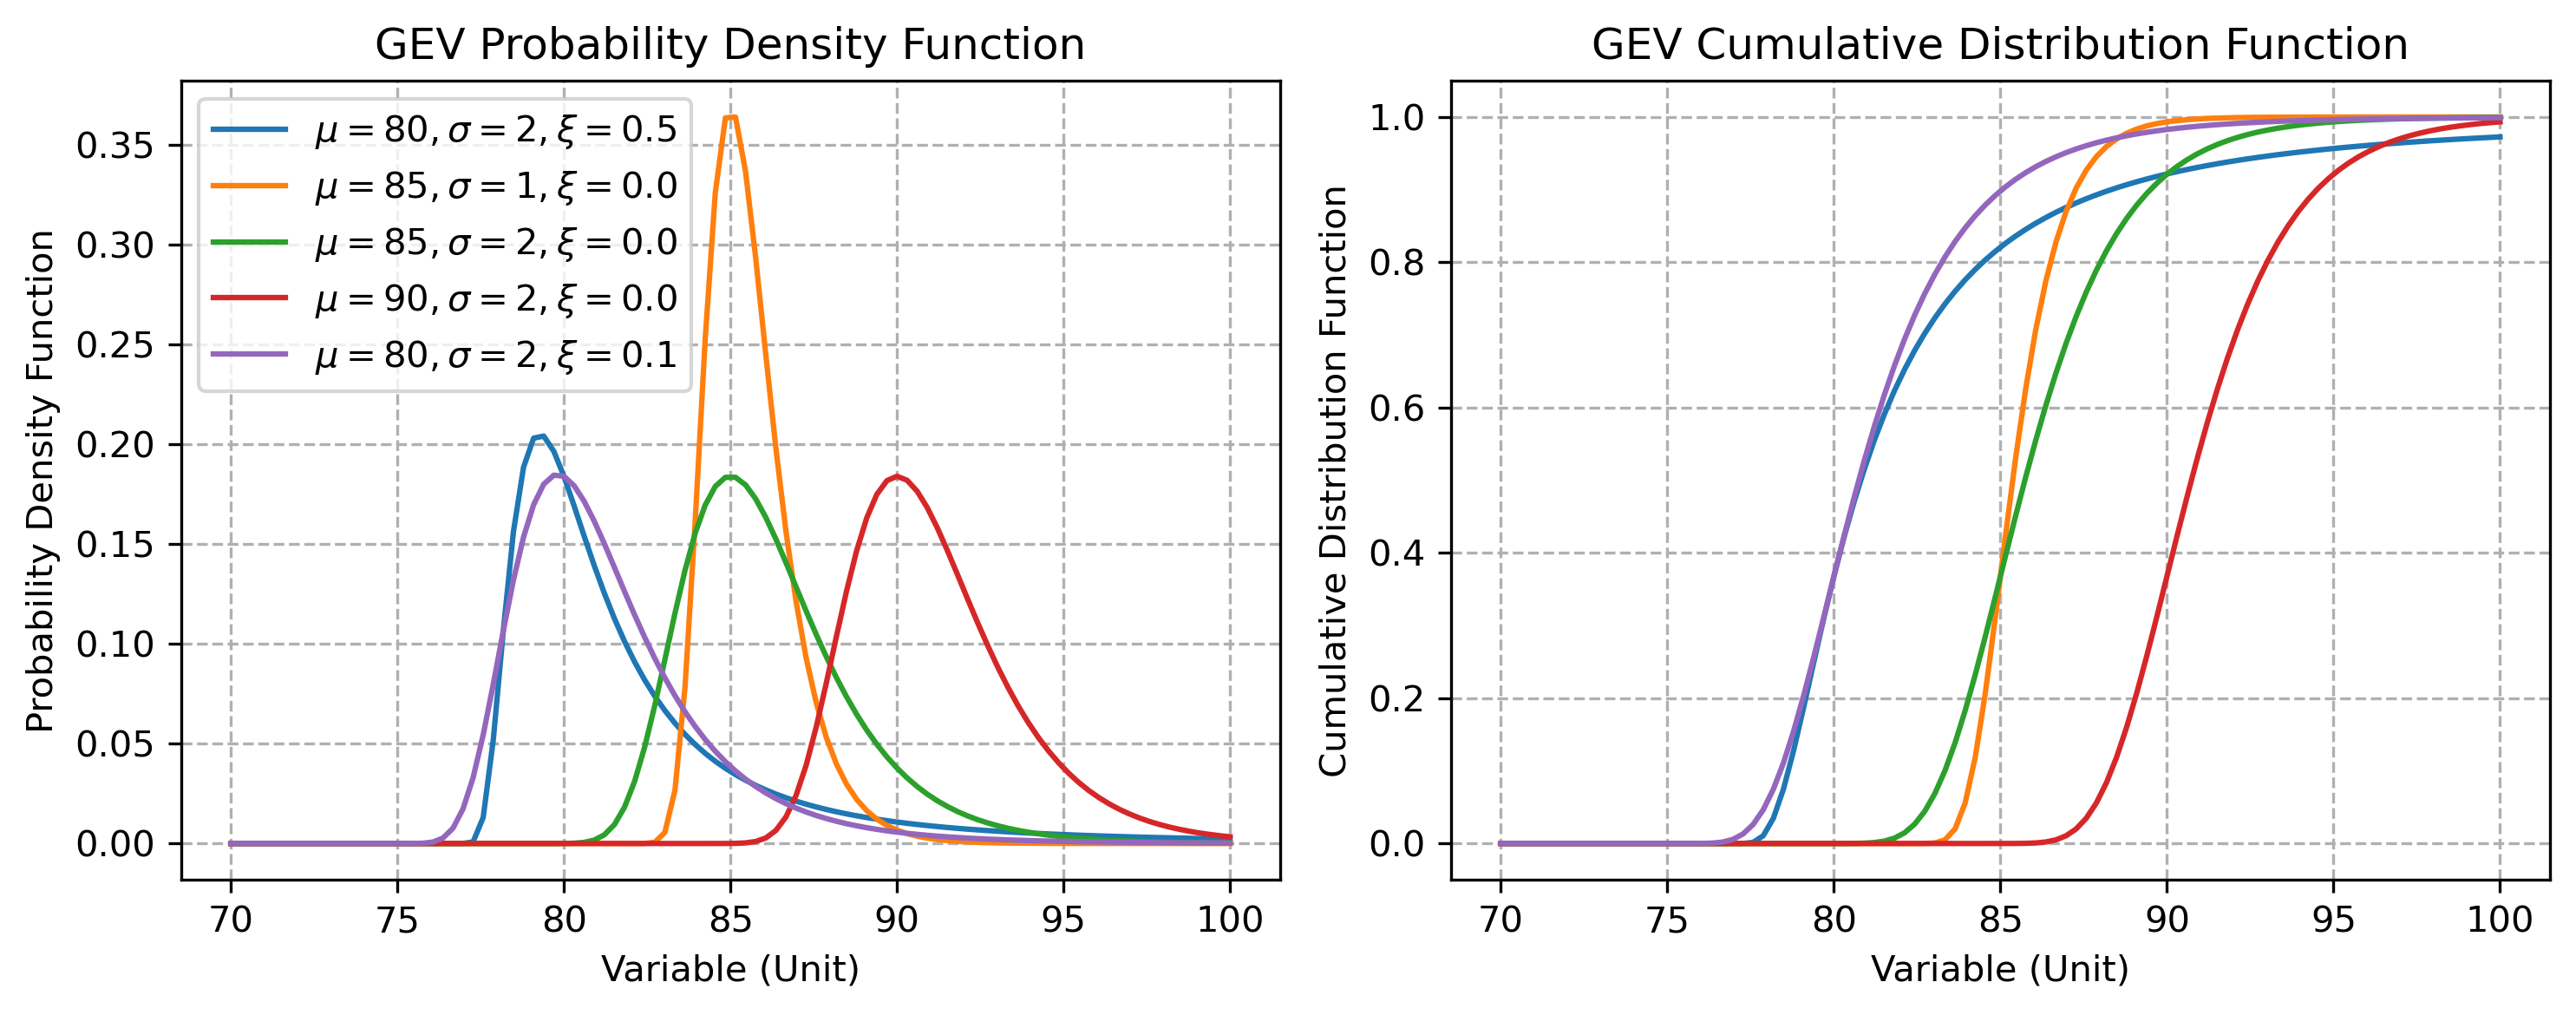

In [3]:

x = np.linspace(70, 100, 100)

# Parameters for GEV
params = [
    (80, 2, 0.5),  # location, scale, shape
    (85, 1, 0.0), 
    (85, 2, 0.0), 
    (90, 2, 0.0), 
    (80, 2, 0.1)
]

# Create 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

# Plot PDFs and CDFs in a single loop
for param in params:
    mu, sigma, xi = param
    pdf_values = gev_pdf(x, mu, sigma, xi)
    cdf_values = gev_cdf(x, mu, sigma, xi)
    
    ax[0].plot(x, pdf_values, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$")
    ax[1].plot(x, cdf_values, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$")
    ax[0].grid(ls='--')
    ax[1].grid(ls='--')
# Customize PDF subplot
ax[0].set_title("GEV Probability Density Function")
ax[0].set_xlabel("Variable (Unit)")
ax[0].set_ylabel("Probability Density Function")
ax[0].legend()

# Customize CDF subplot
ax[1].set_title("GEV Cumulative Distribution Function")
ax[1].set_xlabel("Variable (Unit)")
ax[1].set_ylabel("Cumulative Distribution Function")

plt.tight_layout()
plt.show()


#### Use the markdown cell (or Matlab Live Editor) feature to discuss the steps you took to verify that these functions are implemented correctly.


- First, confirm that `sigma` > 0; otherwise, the program will throw an error.
- When calculating the PDF, an array initialized to all zeros is set up to ensure that if certain conditions are not met (such as `t(x)` <= 0), the output array still maintains the same shape and can be returned.
- When calculating the CDF, cases for (`xi` < 0) and (`xi` > 0 ) are classified and discussed. Initially, without this classification, the results were unreasonable; the CDF exceeded the bounds of probability logic (i.e., going above 1 or below 0) at certain positions. For instance, after the CDF reached 1, it could irrationally drop back to 0 under some conditions, which is unacceptable in practical probability models.
- The formulas for the GEV PDF and GEV CDF were derived from Wikipedia.
- Contrast these function with genextreme from the scipy package.
————————————————————————————————————————————————————————————————————————————————————————

So far, I still have some doubts:
When I use the scipy.stats package to calculate the GEV PDF and CDF, I find that the results differ from the images I presented (as seen in the first row of the figure below), where the position of the blue line can be easily observed. However, when I change `xi` to `-xi`, the results from scipy match mine (as seen in the second row of the figure below). I have not yet found any mistakes in my previous code.

**Updata(Oct 7): The issue mentioned above arises because the `genextreme` function in the `scipy` package uses `-xi` instead of `xi`. Refer to the figure below for more details:

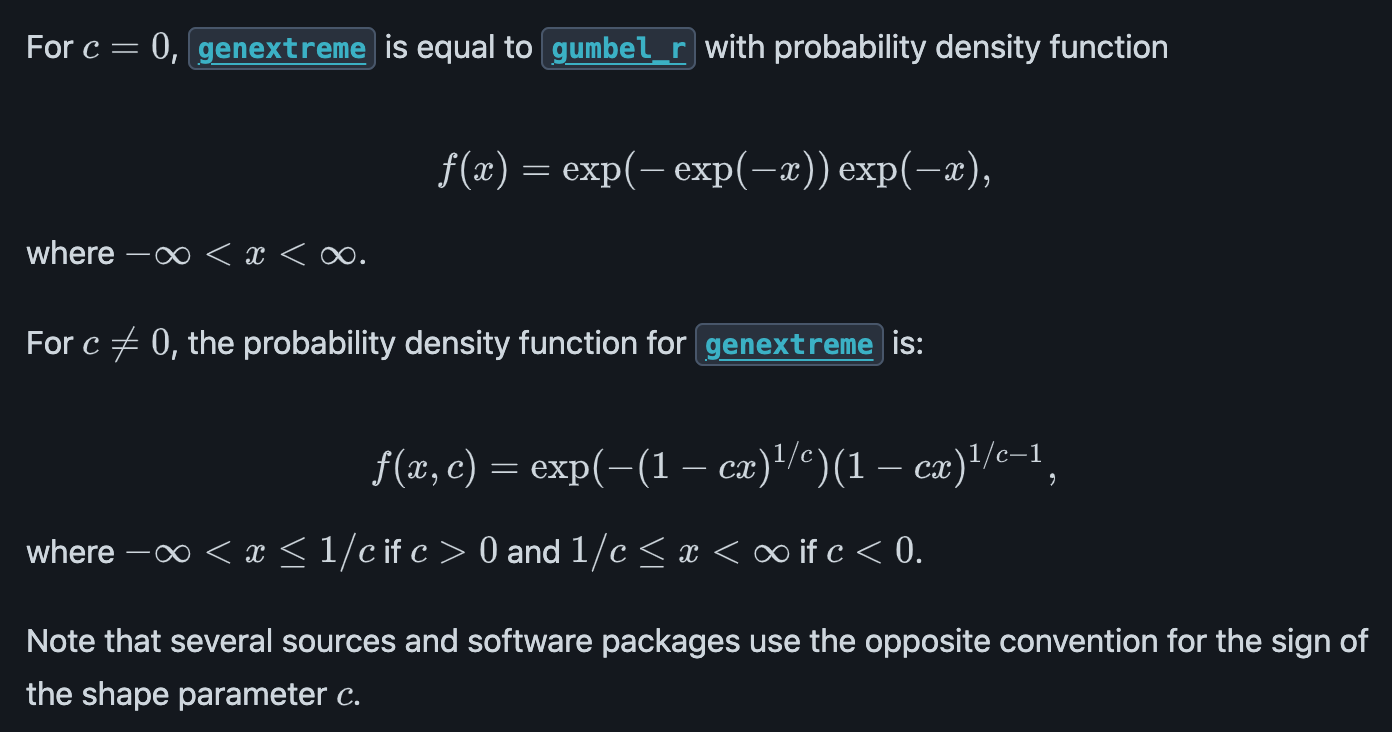

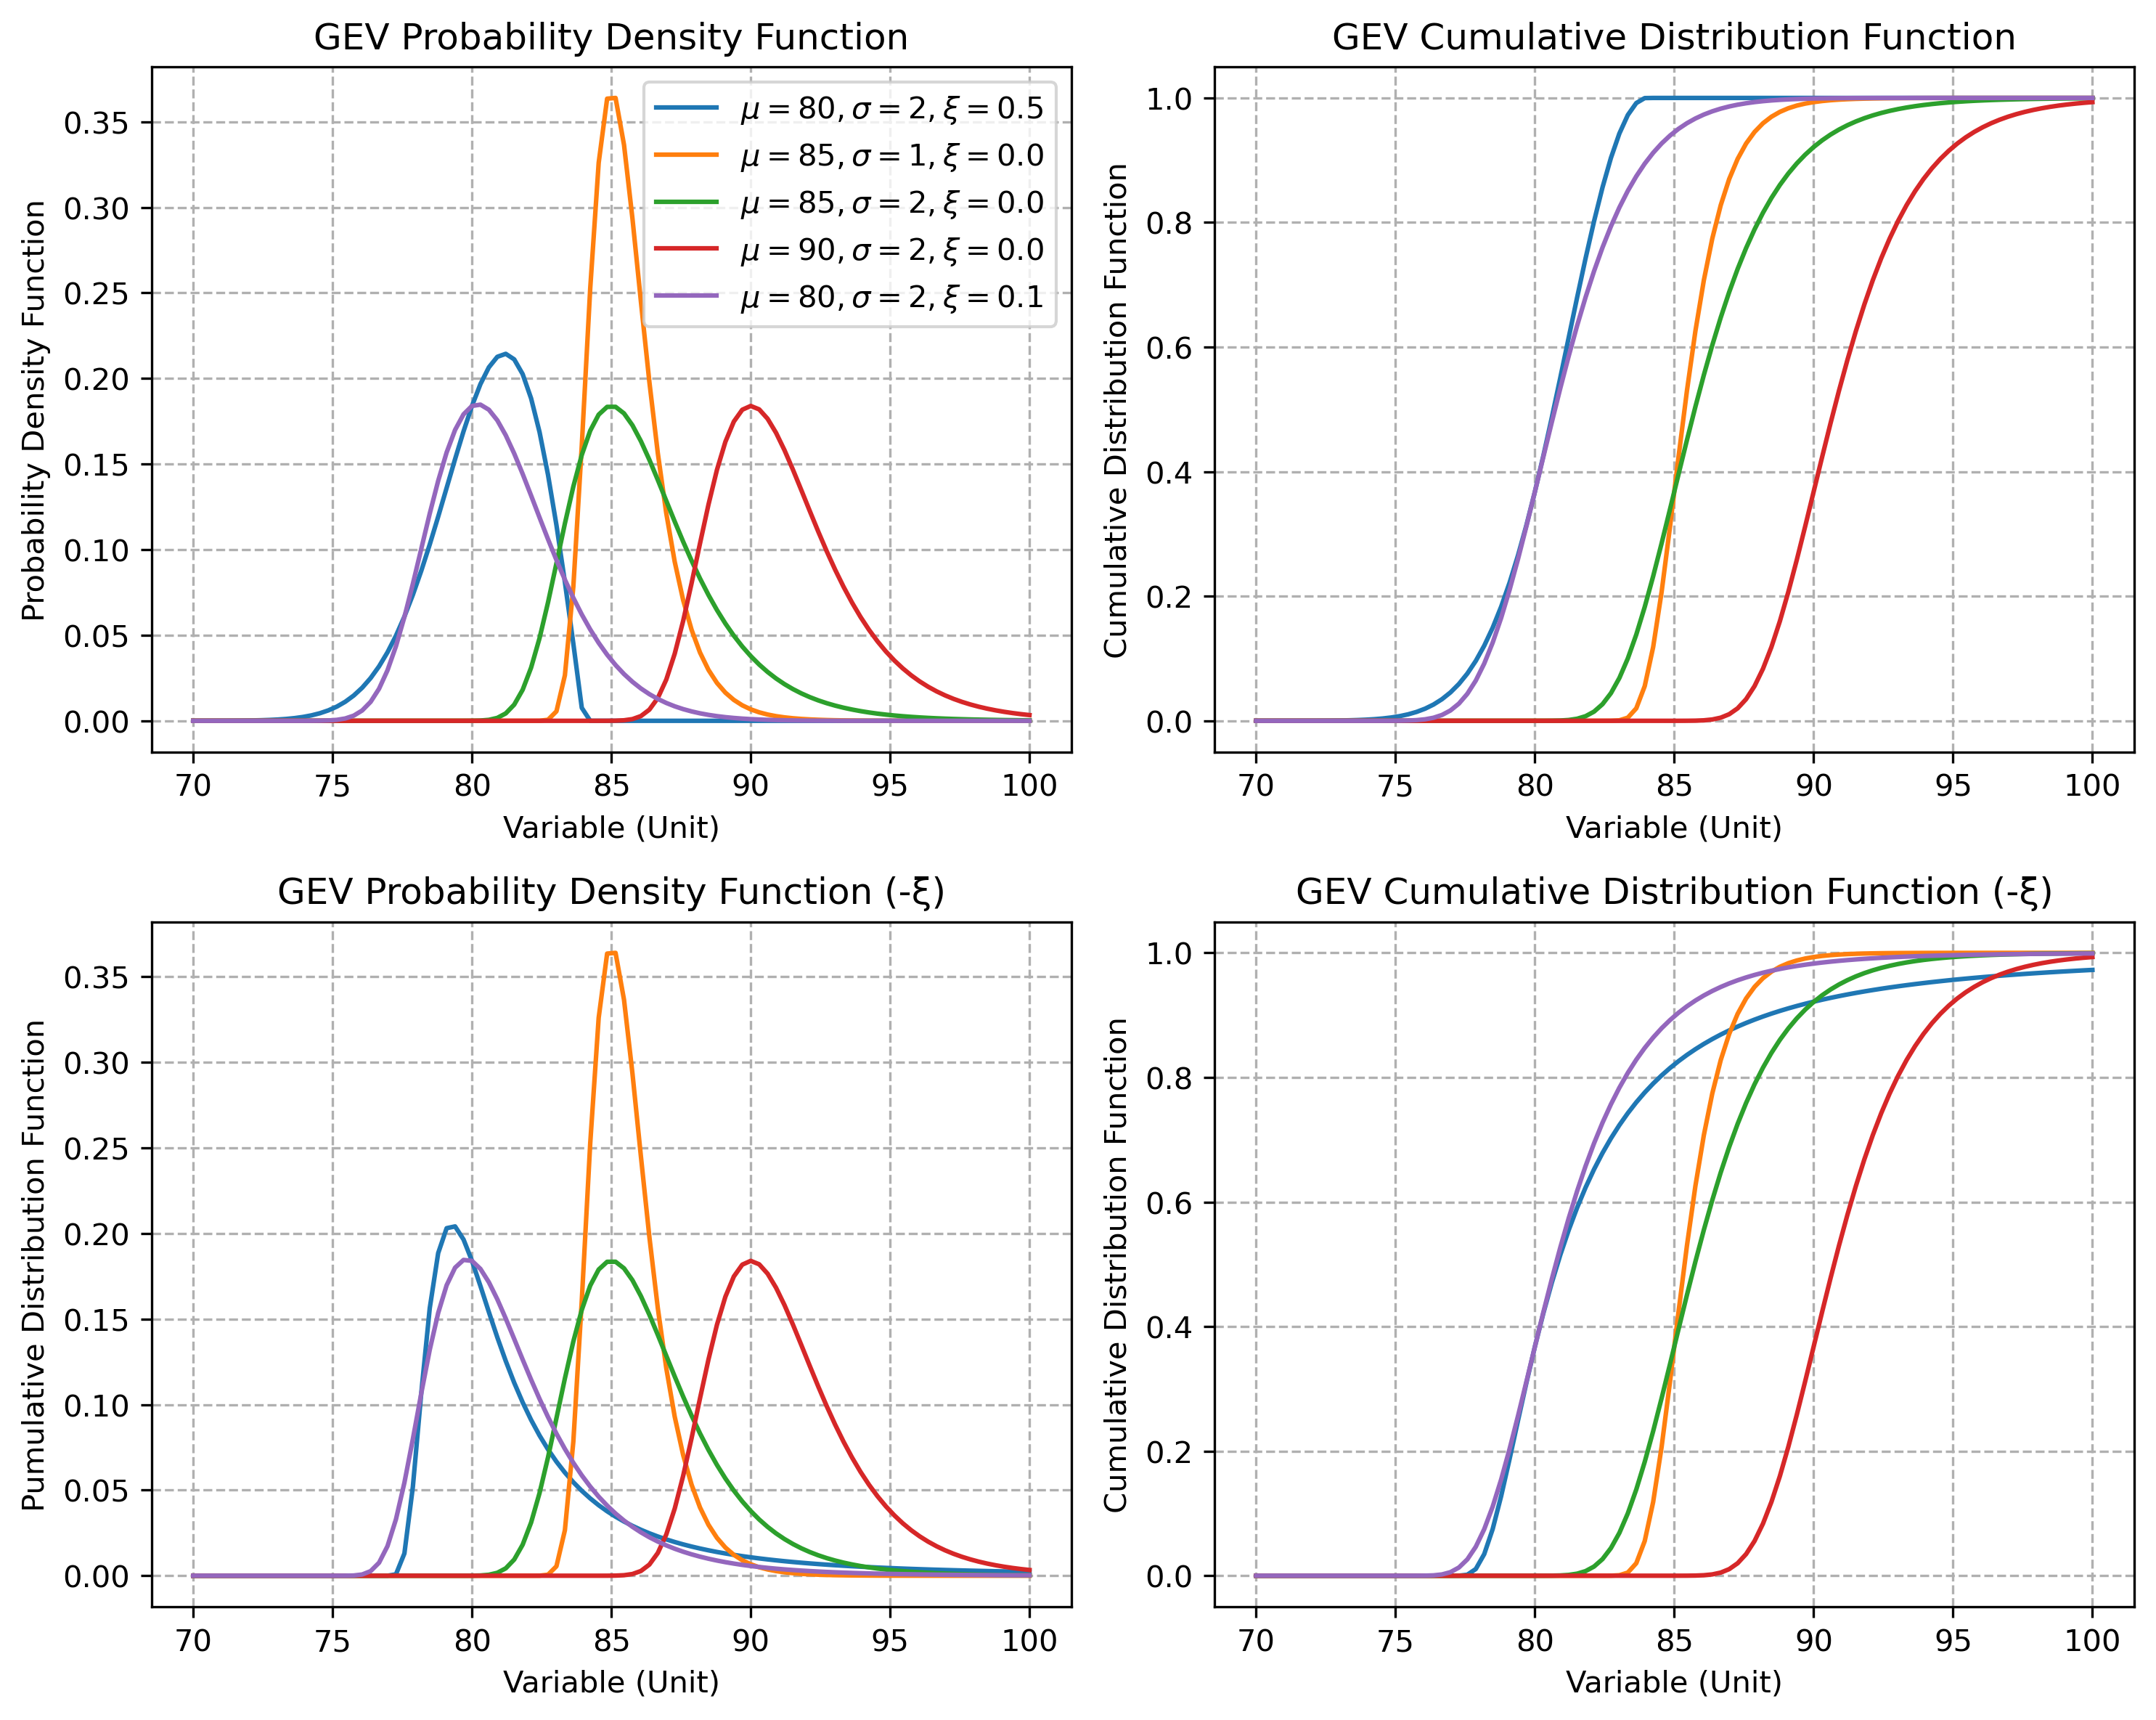

In [4]:
# Generate x values
x = np.linspace(70, 100, 100)

# Parameters for GEV
params = [
    (80, 2, 0.5),  # location, scale, shape
    (85, 1, 0.0), 
    (85, 2, 0.0), 
    (90, 2, 0.0), 
    (80, 2, 0.1)
]

# Create 1x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8), dpi=300)

for param in params:
    mu, sigma, xi = param

    pdf_v = genextreme.pdf(x, xi, loc=mu, scale=sigma)
    cdf_v = genextreme.cdf(x, xi, loc=mu, scale=sigma)
    
    # !!!change ξ to -ξ !!!!! and plot in second row!!!
    pdf_v_ = genextreme.pdf(x, -xi, loc=mu, scale=sigma) # change to -xi
    cdf_v_ = genextreme.cdf(x, -xi, loc=mu, scale=sigma) # change to -xi
    
    # Plot PDF and CDF
    ax[0, 0].plot(x, pdf_v, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$")
    ax[0, 1].plot(x, cdf_v, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$")
    ax[1, 0].plot(x, pdf_v_, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$")
    ax[1, 1].plot(x, cdf_v_, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$")

# Customize PDF subplot
ax[0, 0].set_title("GEV Probability Density Function")
ax[0, 0].set_xlabel("Variable (Unit)")
ax[0, 0].set_ylabel("Probability Density Function")
ax[0, 0].grid(ls='--')
ax[0, 0].legend()

# Customize CDF subplot
ax[0, 1].set_title("GEV Cumulative Distribution Function")
ax[0, 1].set_xlabel("Variable (Unit)")
ax[0, 1].set_ylabel("Cumulative Distribution Function")
ax[0, 1].grid(ls='--')

ax[1, 0].set_title("GEV Probability Density Function (-ξ)")
ax[1, 0].set_xlabel("Variable (Unit)")
ax[1, 0].set_ylabel("Pumulative Distribution Function")
ax[1, 0].grid(ls='--')

ax[1, 1].set_title("GEV Cumulative Distribution Function (-ξ)")
ax[1, 1].set_xlabel("Variable (Unit)")
ax[1, 1].set_ylabel("Cumulative Distribution Function")
ax[1, 1].grid(ls='--')


plt.tight_layout()
plt.show()



# 3. Invert the CDF to get the quantile function (10 points)

We start with the CDF of the Generalized Extreme Value (GEV) distribution:
$$
\
F(x) = \exp\left(- \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-1/\xi} \right)
\
$$
Our goal is to invert this equation and solve for \(x\) as a function of the quantile \(q\), where \(q = F(x)\). The quantile function \(Q(q)\) gives the value of \(x\) corresponding to the quantile \(q\).

### Step 1: Set up the equation for inversion
We set the CDF equal to the quantile \(q\):
$$
\
q = \exp\left(- \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-1/\xi} \right)
\
$$
### Step 2: Take the logarithm of both sides
Taking the natural logarithm of both sides:
$$
\
\ln(q) = - \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-1/\xi}
\
$$
Multiply by \(-1\):
$$
\
-\ln(q) = \left(1 + \xi \frac{x - \mu}{\sigma}\right)^{-1/\xi}
\
$$
### Step 3: Invert the exponent
Raise both sides to the power of $-\xi$:
$$
\
(-\ln(q))^{-\xi} = 1 + \xi \frac{x - \mu}{\sigma}
\
$$
### Step 4: Solve for \(x\)
Isolating \(x\) gives:
$$
\
\xi \frac{x - \mu}{\sigma} = (-\ln(q))^{-\xi} - 1
\
$$
$$
\
x - \mu = \frac{\sigma}{\xi} \left( (-\ln(q))^{-\xi} - 1 \right)
\
$$
Finally, the quantile function \(Q(q)\) is:
$$
\
Q(q) = \mu + \frac{\sigma}{\xi} \left( (-\ln(q))^{-\xi} - 1 \right)
\
$$


The above is the conversion process when $-\xi$≠0. For the case when $-\xi$=0, the processing method is similar to the above.

We can write the following gev_quantile function:

In [5]:
def gev_quantile(q, mu, sigma, xi):
    """
    Calculate the quantile function (inverse CDF) of the GEV distribution.
    
        Parameters:
    q : array-like, Quantiles to evaluate (values between 0 and 1).
    mu : float, Location parameter.
    sigma : float, Scale parameter.
    xi : float, Shape parameter.
    
    Returns:
    quantile : array-like, Values of the GEV quantile (inverse CDF) corresponding to the given q values.
    
    """
    assert sigma > 0, "sigma must be positive"

    if xi != 0:  # Handle the case where xi != 0
        x = mu + (sigma / xi) * ((-np.log(q)) ** (-xi) - 1)
    else:        # Special case for xi = 0
        x = mu - sigma * np.log(-np.log(q))
    
    return x


The following plot is used to verify the correctness of the above results. The x value when `q`=0.4 is calculated and marked in the figure. (The green line in the figure of the previous question is selected as a case analysis): 

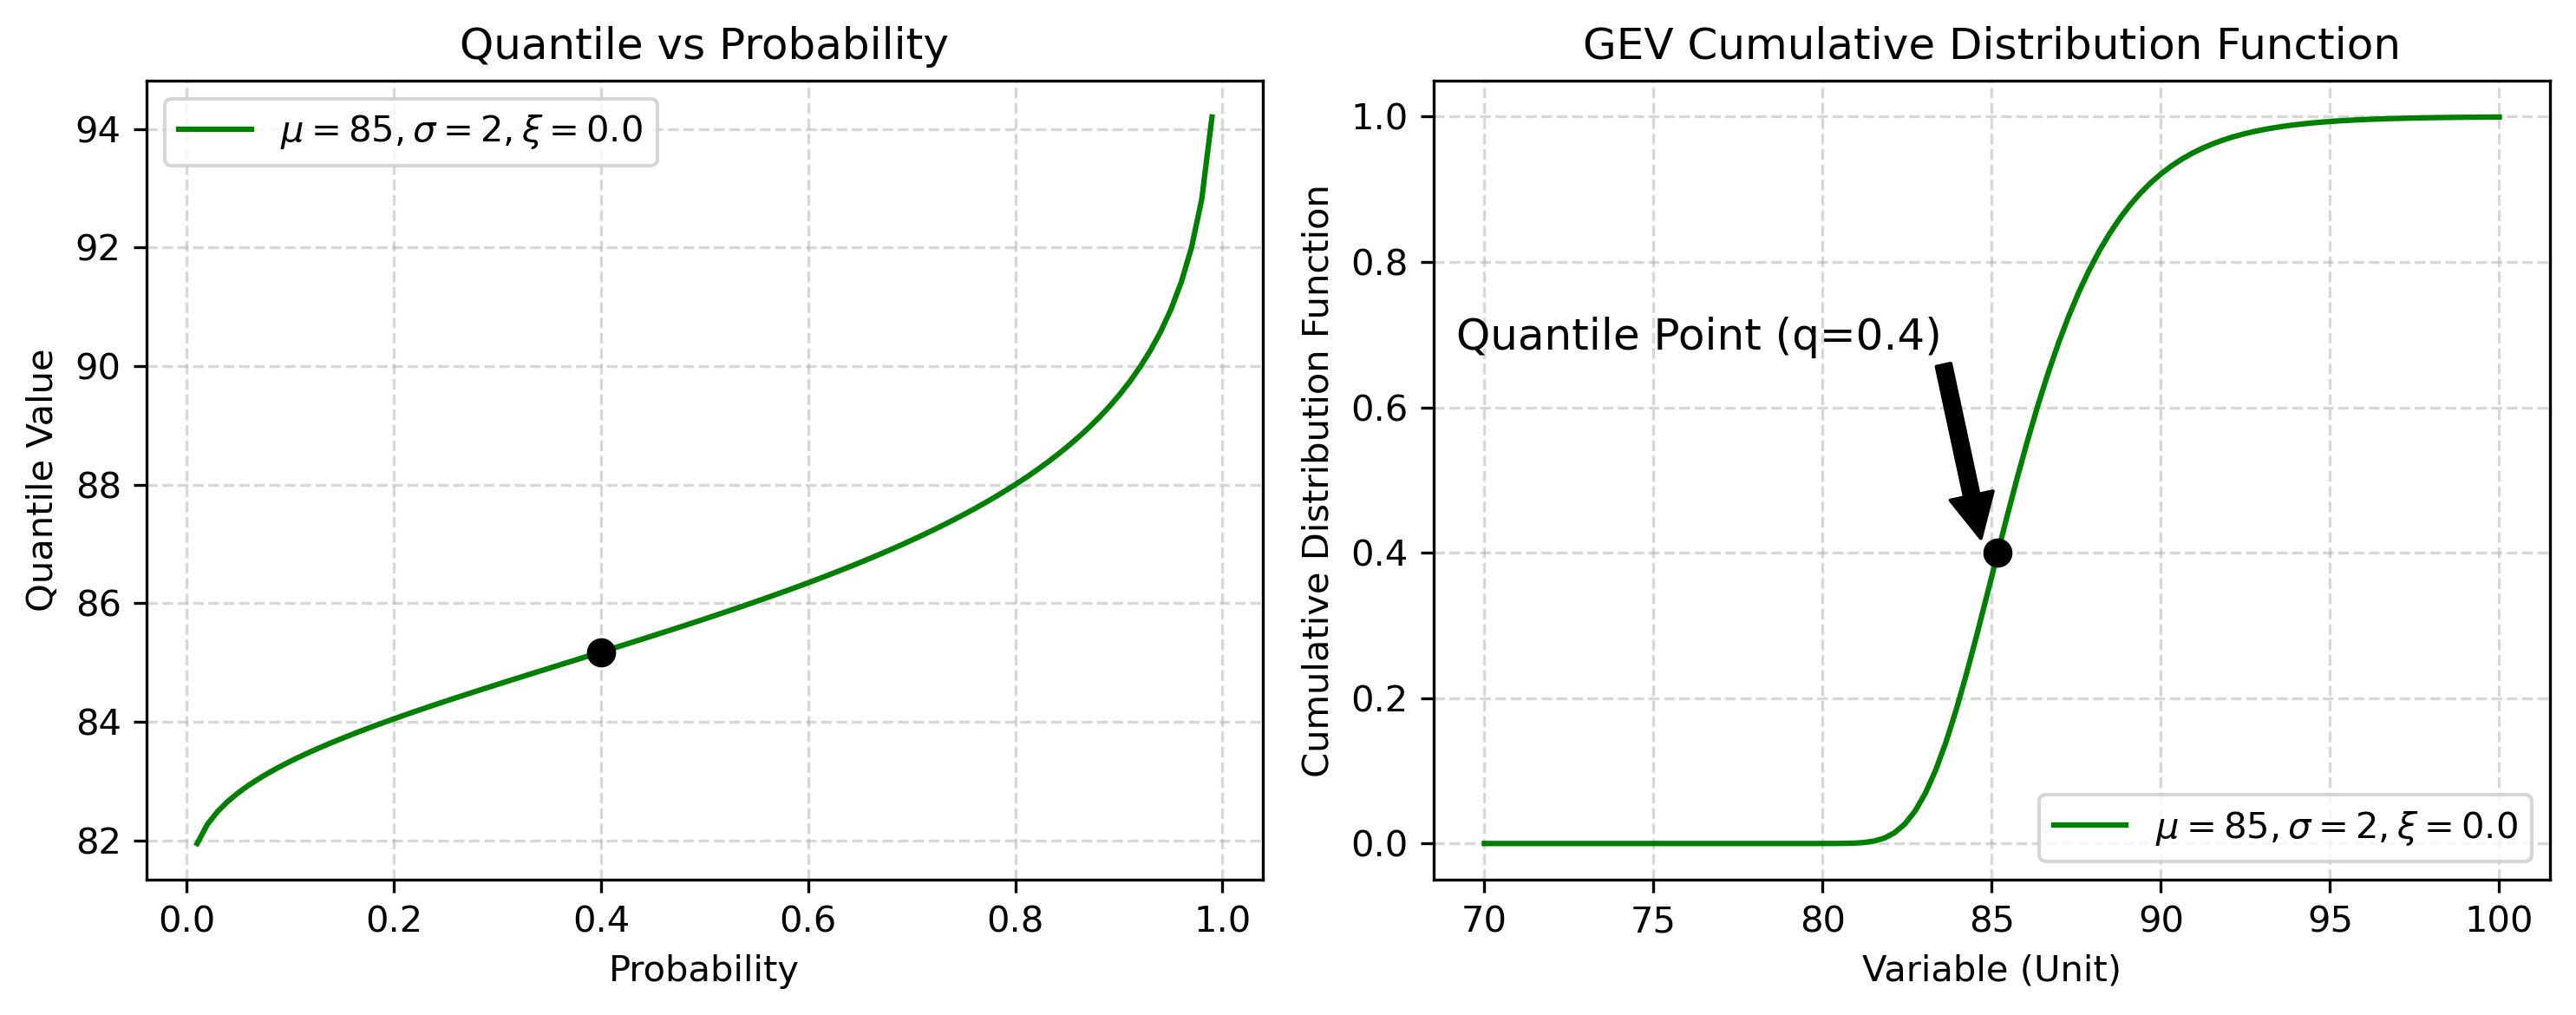

In [6]:

x = np.linspace(70, 100, 100)
q_values = np.linspace(0.01, 0.99, 100) # q varies from 0.01 to 0.99
q = 0.4  # Calculate the inverse function using q=0.4 as an example

# Parameters for GEV
params = [ 
    (85, 2, 0.0), # location, scale, shape
]

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

for param in params:
    mu, sigma, xi = param
    cdf_values = gev_cdf(x, mu, sigma, xi) # Calculate GEV CDF
    quantile_value = gev_quantile(q, mu, sigma, xi) # Calculate the value of x for a specific q
    quantile_values = [gev_quantile(q_s, mu, sigma, xi) for q_s in q_values]  # Calculate the quantile value for different q
    
    ax[0].plot(q_values, quantile_values, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$", color='green')
    ax[0].scatter(q, quantile_value, color='k', s=50, zorder=2)
    ax[0].grid(ls='--', alpha=0.5)
    ax[1].plot(x, cdf_values, label=f"$\\mu={mu}, \\sigma={sigma}, \\xi={xi}$", color='green') # plot CDF
    
    # x = quantile_value, q=gev_cdf(quantile_value, mu, sigma, xi) is marked with a black dot in the figure
    ax[1].scatter(quantile_value, gev_cdf(quantile_value, mu, sigma, xi), color='k',s=50, zorder=2) 
    ax[1].grid(ls='--', alpha=0.5)
    
ax[0].set_title("Quantile vs Probability")
ax[0].set_xlabel("Probability")
ax[0].set_ylabel("Quantile Value")
ax[0].legend(loc=2)
ax[1].set_title("GEV Cumulative Distribution Function")
ax[1].set_xlabel("Variable (Unit)")
ax[1].set_ylabel("Cumulative Distribution Function")
ax[1].legend(loc=4)

ax[1].annotate('Quantile Point (q=0.4)', c='k',
                xy=(quantile_value-0.5, q+0.02),  # The coordinates that the arrow points to
                xytext=(quantile_value - 16, q + 0.28),  # Text position
                arrowprops=dict(facecolor='black',),  # Arrow properties
                fontsize=12, color='blue')


plt.tight_layout()
plt.show()

This analysis demonstrates the correctness of the inverse function for the Generalized Extreme Value (GEV) distribution through a graphical representation of the cumulative distribution function (CDF) and the corresponding quantile point at \( `q` = 0.4 \) (Compare the two pictures above). The plotted black dot on the CDF confirms that the quantile value aligns with the expected output. The annotation emphasizes its significance, validating that the implementation accurately reflects the theoretical properties of the GEV distribution.

# 4. Implement non-stationary GEV PDF and CDF with time as a covariate (10 points)

#### Write three new functions that implement non-stationary GEV PDF, CDF, and the quantile function Q (solved for above). Assume that time t is the covariate, and use a non-stationary model that assume μ(t) = cμ ⋅ t + μ0 and that σ and ξ are constant.

### Non-Stationary GEV

Non-stationary location parameters:
$$
\
\mu(t) = c_{\mu} \cdot t + \mu_0
\
$$
PDF of nonstationary GEV:
$$
\
F_{pdf}(x, t; c_{\mu}, \mu_0, \sigma, \xi) = 
\begin{cases} 
\frac{1}{\sigma} \left(1 + \xi \frac{x - (c_{\mu} \cdot t + \mu_0)}{\sigma}\right)^{-\frac{1}{\xi} - 1} \cdot \exp\left(-\left(1 + \xi \frac{x - (c_{\mu} \cdot t + \mu_0)}{\sigma}\right)^{-\frac{1}{\xi}}\right) & \text{if } \xi \neq 0 \\ 
\frac{1}{\sigma} \exp\left(-\frac{x - (c_{\mu} \cdot t + \mu_0)}{\sigma}\right)^{{\xi} + 1} \exp\left(-\exp\left(-\frac{x - (c_{\mu} \cdot t + \mu_0)}{\sigma}\right)\right) & \text{if } \xi = 0 
\end{cases}
\
$$
CDF of non-stationary GEV:
$$
\
F_{cdf}(x, t; c_{\mu}, \mu_0, \sigma, \xi) = 
\begin{cases} 
\exp\left(-\left(1 + \xi \frac{x - (c_{\mu} \cdot t + \mu_0)}{\sigma}\right)^{-\frac{1}{\xi}}\right) & \text{if } \xi \neq 0 \\ 
\exp\left(-\exp\left(-\frac{x - (c_{\mu} \cdot t + \mu_0)}{\sigma}\right)\right) & \text{if } \xi = 0 
\end{cases}
\
$$
Quantile Function of Non-Stationary GEV:
$$
\
Q(q, t; c_{\mu}, \mu_0, \sigma, \xi) = 
\begin{cases} 
c_{\mu} \cdot t + \mu_0 + \frac{\sigma}{\xi} \left( (-\log(q))^{-\xi} - 1 \right) & \text{if } \xi \neq 0 \\ 
c_{\mu} \cdot t + \mu_0 - \sigma \cdot \log(-\log(q)) & \text{if } \xi = 0 
\end{cases}
\
$$


The three functions above can be represented by the following code:

In [7]:
def gev_ns_pdf(x, t, cmu, mu0, sigma, xi):
    """ 
    Calculate the non-stationary GEV PDF with μ(t) = cmu * t + mu0
        Parameters:
    x : array-like, the values at which to evaluate the PDF.
    t : float or array-like, the time variable for which the non-stationarity is introduced.
    cmu : float, the coefficient for the time-varying location parameter μ(t).
    mu0 : float, the location parameter.
    sigma : float, the scale parameter.
    xi : float, the shape parameter.

    Returns:
    pdf : array-like, the calculated PDF values for each x at time t.
    The location parameter μ(t) is modeled as a linear function of time:
        μ(t) = cmu * t + mu0
    This allows the GEV distribution to vary with time, representing non-stationarity.
    """
    # Make sure sigma is positive
    assert sigma > 0, "sigma must be positive"

    # Calculate the time-dependent location parameter μ(t)
    mu_t = cmu * t + mu0

    # Calculate the value of t(x) = 1 + xi * (x - μ(t)) / σ
    t_x = 1 + xi * (x - mu_t) / sigma

    # Check if t(x) > 0, otherwise PDF is 0
    valid = t_x > 0
    pdf = np.zeros_like(x)

    if xi != 0:
        pdf[valid] = (1 / sigma) * (t_x[valid] ** (-1 / xi - 1)) * np.exp(-t_x[valid] ** (-1 / xi))
    else:  # Special case when ξ = 0 
        pdf[valid] = (1 / sigma) * np.exp(-(x[valid] - mu_t[valid]) / sigma)**(xi+1) * np.exp(-np.exp(-(x[valid] - mu_t[valid]) / sigma))
    
    return pdf


def gev_ns_cdf(x, t, cmu, mu0, sigma, xi):
    """ 
    Calculate the non-stationary GEV CDF with μ(t) = cmu * t + mu0
        Parameters:
    x : array-like, the values at which to evaluate the CDF.
    t : float or array-like, the time variable for which the non-stationarity is introduced.
    cmu : float, the coefficient for the time-varying location parameter μ(t).
    mu0 : float, the location parameter
    sigma : float, the scale parameter.
    xi : float, the shape parameter

    Returns:
    cdf : array-like, the calculated CDF values for each x at time t.
    The location parameter μ(t) is modeled as a linear function of time:
        μ(t) = cmu * t + mu0
    This allows the GEV distribution to vary with time, representing non-stationarity.
    """
    # Make sure sigma is positive
    assert sigma > 0, "sigma must be positive"

    # Calculate the time-dependent location parameter μ(t)
    mu_t = cmu * t + mu0

    # Calculate the value of t(x) = 1 + xi * (x - μ(t)) / σ
    t_x = 1 + xi * (x - mu_t) / sigma

    # Check if t(x) > 0, otherwise CDF is 0
    valid = t_x > 0
    cdf = np.zeros_like(x)

    if xi == 0:  # Special case when ξ = 0 (limiting distribution)
        cdf[valid] = np.exp(-np.exp(-(x[valid] - mu_t[valid]) / sigma))
    elif xi > 0:  # ξ > 0
        cdf[valid] = np.exp(-t_x[valid] ** (-1 / xi))
    elif xi < 0:  # ξ < 0
        cdf = np.ones_like(x)
        cdf[valid] = np.exp(-t_x[valid] ** (-1 / xi))

    return cdf


def gev_ns_quantile(q, t, cmu, mu0, sigma, xi):
    """
    Calculate the non-stationary GEV (Generalized Extreme Value) quantile function (inverse CDF)
    
    Parameters:
    q : array-like, the quantile values (between 0 and 1) at which to evaluate the inverse CDF.
    t : float or array-like, the time variable for which the non-stationarity is introduced.
    cmu : float, the coefficient for the time-varying location parameter μ(t).
    mu0 : float, the location parameter.
    sigma : float, the scale parameter.
    xi : float, the shape parameter.

    Returns:
    quantile : array-like
        The calculated quantile values for the given q at time t.

    The location parameter μ(t) is modeled as a linear function of time:
        μ(t) = cmu * t + mu0
    This allows the GEV distribution's quantiles to vary with time, representing non-stationarity.
    """
    assert sigma > 0, "sigma must be positive"

    # Calculate the time-dependent location parameter μ(t)
    mu_t = cmu * t + mu0

    if xi != 0:  # Handle the case where ξ ≠ 0
        x = mu_t + (sigma / xi) * ((-np.log(q)) ** (-xi) - 1)
    else:  # Special case for ξ = 0
        x = mu_t - sigma * np.log(-np.log(q))
    
    return x


Plotting the PDF, CDF and q of the non-stationary GEV based on the above functions

The three plots below respectively show the GEV PDF, CDF, and quantile function with time as a covariate. I attempted to verify the correctness of my results through these images, but I encountered some mismatches. For example, when comparing the CDF and quantile function for the dark red line, the values at probability = 0.2 (BLACK dot) do not match. However, I have not yet found an error in my code.

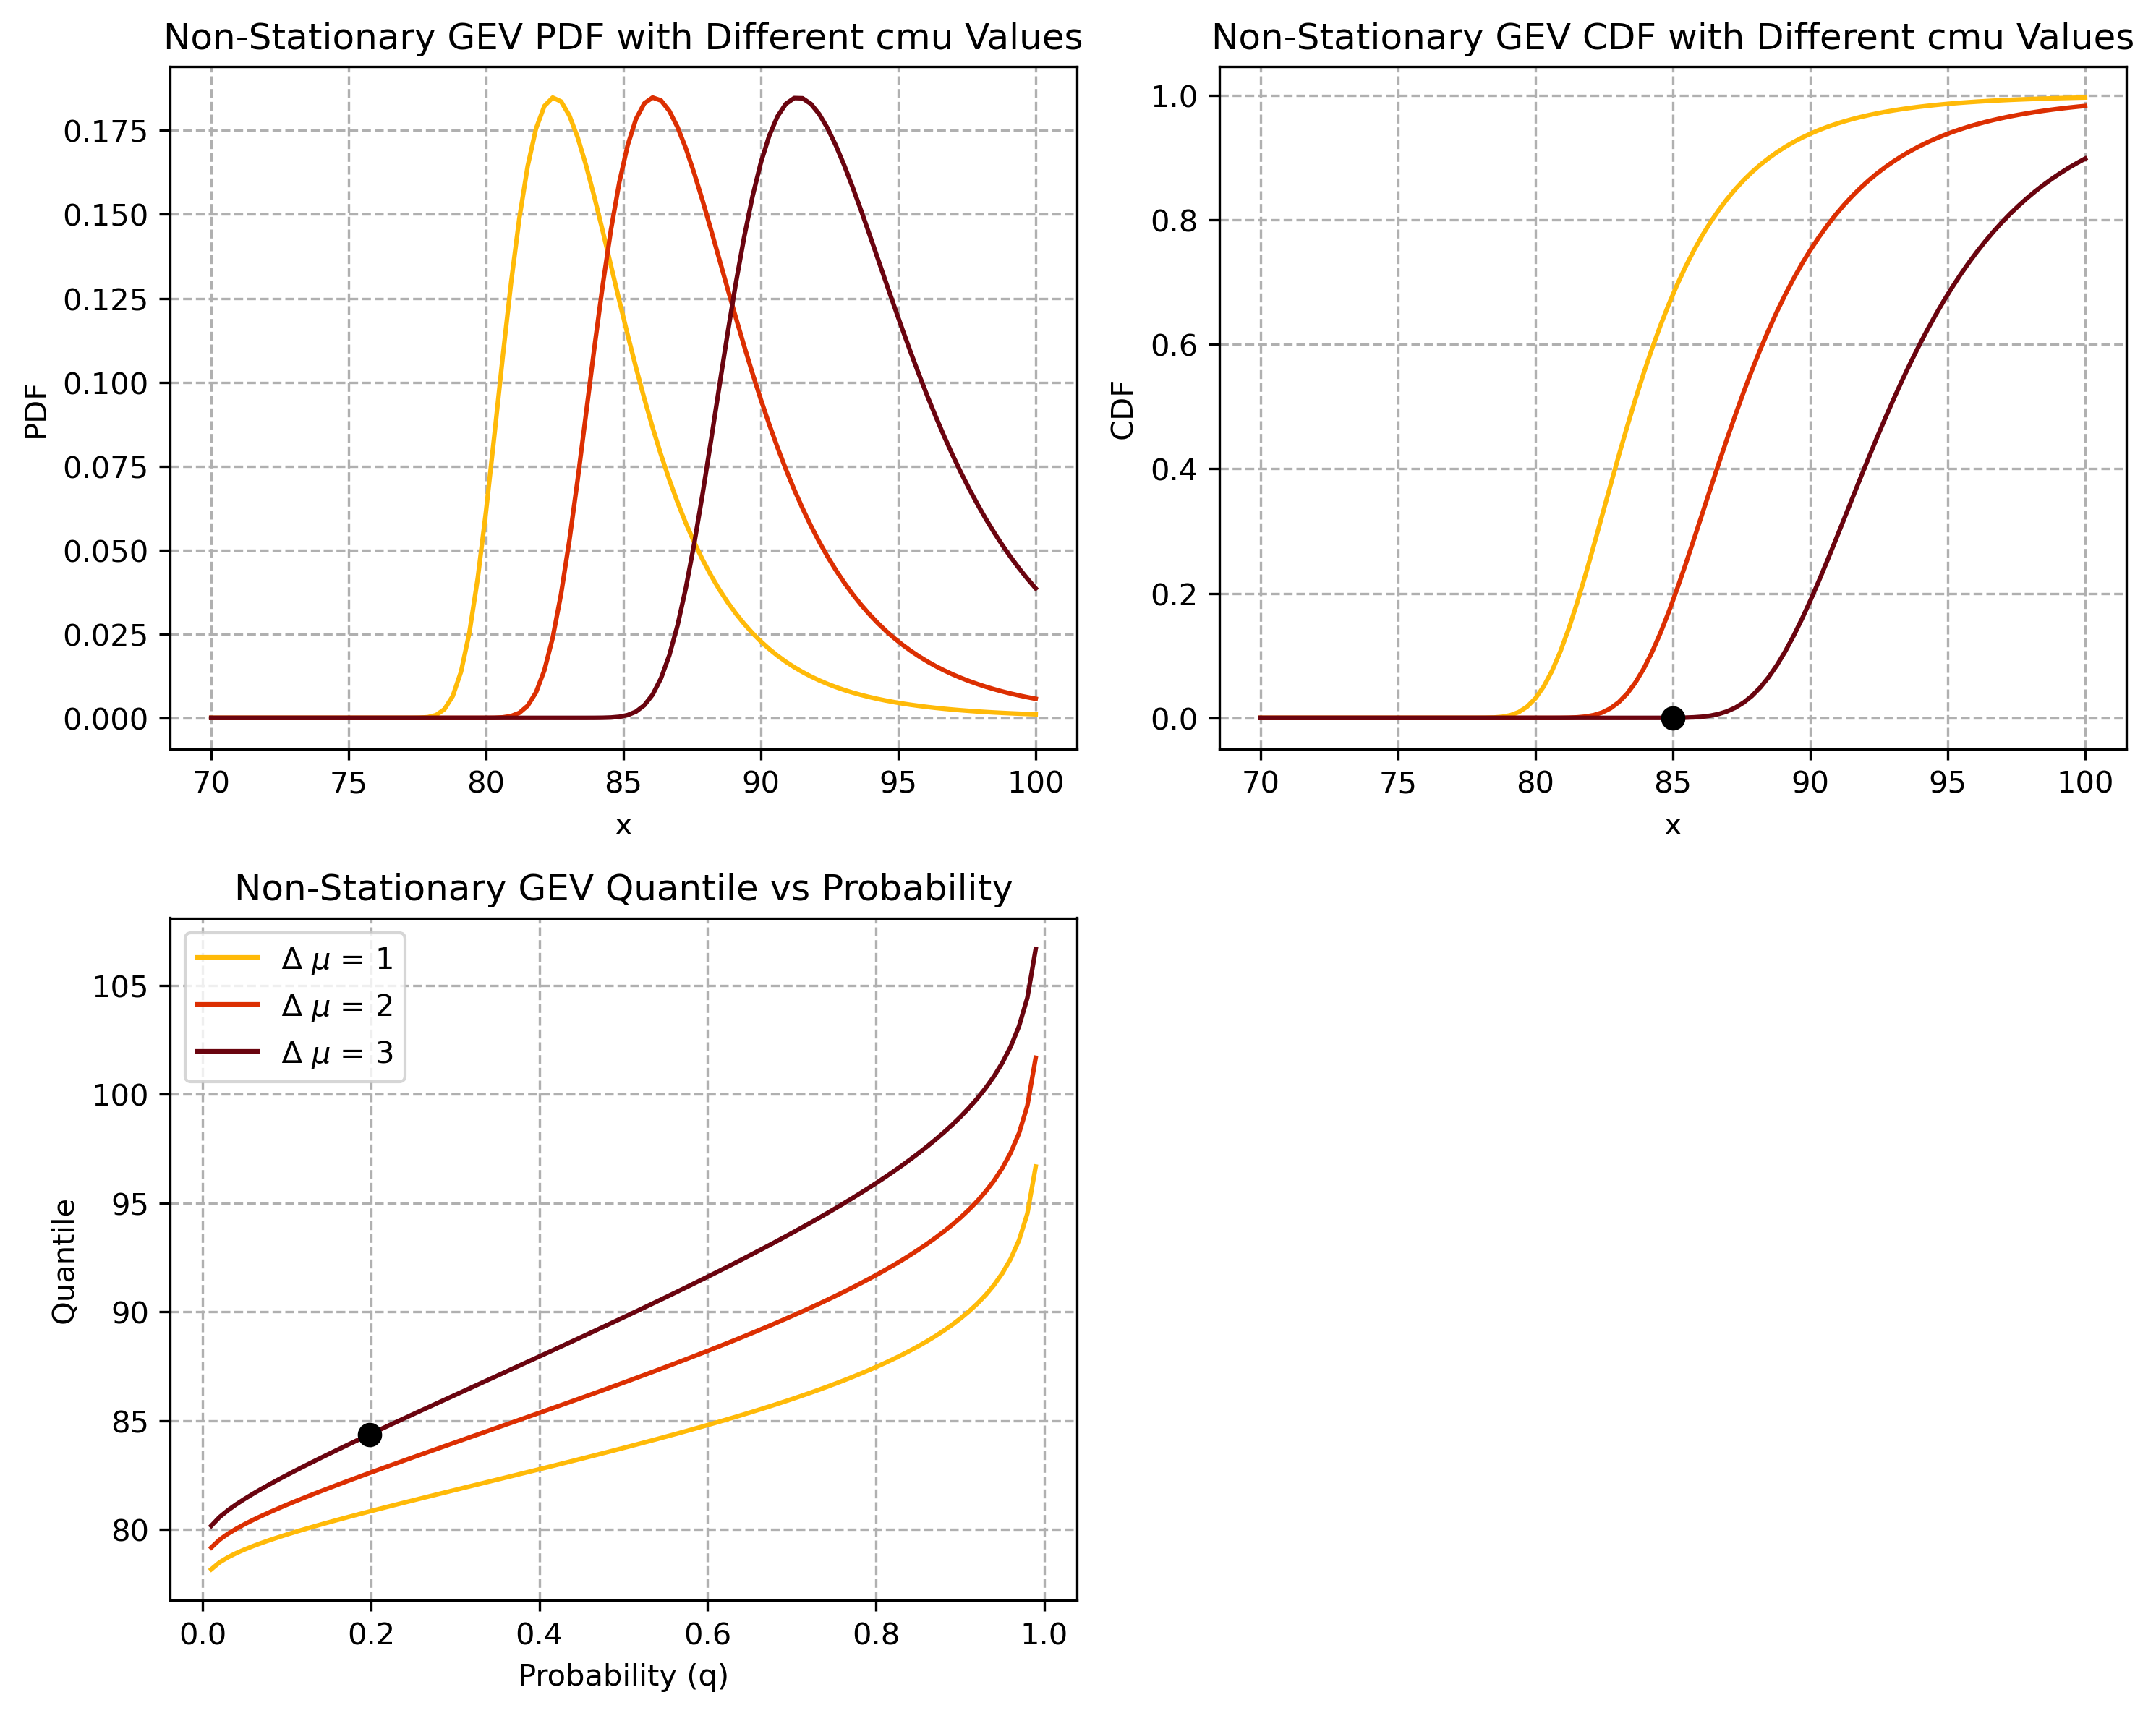

In [8]:
# Generate values for plotting
x = np.linspace(70, 100, 100)  # x values
t = np.linspace(1, 5, 100)    # Time values associated with each x
q_values = np.linspace(0.01, 0.99, 100)  # q varies from 0.01 to 0.99

# Define parameters
q = 0.2
cmu_values = [1, 2, 3]  # Different cmu values
mu0 = 80
sigma = 2
xi = 0.1

# Define the colors
colors = ['#ffba08', '#dc2f02', '#6a040f']

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8), dpi=300)

# Plot Non-Stationary GEV PDF
for cmu, color in zip(cmu_values, colors):
    pdf = gev_ns_pdf(x, t, cmu, mu0, sigma, xi)
    ax[0, 0].plot(x, pdf, label=f'Change of $\\mu$ = {cmu}', color=color)

ax[0, 0].set_title("Non-Stationary GEV PDF with Different cmu Values")
ax[0, 0].set_xlabel("x")
ax[0, 0].set_ylabel("PDF")
ax[0, 0].grid(ls='--')

# Plot Non-Stationary GEV CDF
for cmu, color in zip(cmu_values, colors):
    cdf = gev_ns_cdf(x, t, cmu, mu0, sigma, xi)
    ax[0, 1].plot(x, cdf, label=f'Change of $\\mu$ = {cmu}', color=color)
ax[0, 1].scatter(85, 0, color='k', s=50, zorder=2)
ax[0, 1].set_title("Non-Stationary GEV CDF with Different cmu Values")
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("CDF")

ax[0, 1].grid(ls='--')

# Plot Quantile vs Probability in ax[1, 1]
for cmu, color in zip(cmu_values, colors):
    quantiles = gev_ns_quantile(q_values, t, cmu, mu0, sigma, xi)
    ax[1, 0].plot(q_values, quantiles, label=f'∆ $\\mu$ = {cmu}', color=color)

ax[1, 0].scatter(q_values[19], quantiles[19], color='k', s=50, zorder=2)
ax[1, 0].set_title("Non-Stationary GEV Quantile vs Probability")
ax[1, 0].set_xlabel("Probability (q)")
ax[1, 0].set_ylabel("Quantile")
ax[1, 0].grid(ls='--')
ax[1, 0].legend()
# Hide the fourth subplot
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


1. **Effect on the PDF**:
   - As the value of $c_\mu$ (the rate of change in the location parameter $( \mu(t) = c_\mu \cdot t + \mu_0 $)) increases, the entire PDF shifts to the right.
   - The yellow line ($c_\mu$ = 1) peaks at a lower `x` value, while the dark brown line ($c_\mu$ = 3) peaks at a much higher `x`. This indicates that increasing $c_\mu$ leads to a higher expected value for extreme events, which aligns with the idea that non-stationary processes cause a gradual shift in location (such as rising temperatures or intensifying rainfall over time).
   - The shape of the distribution remains relatively constant, meaning that while the position of the extremes changes, the variability and extremity (controlled by $\sigma$ and $\xi$) are not influenced by the time covariate in this specific model.

2. **Effect on the CDF**:
   - The CDF shows a similar rightward shift as $c_\mu$ increases.
   - The yellow curve (smaller $c_\mu$) suggests that extreme events (higher `x` values) occur at lower probabilities earlier (lower `t`). As $c_\mu$ increases, the same extreme events occur at higher probabilities.
   - This rightward shift in the CDF reflects an increasing trend in the extremes over time, indicating that higher values become more likely as time progresses.

3. **Effect on the Quantiles**:
   - The quantile function plot shows how quantile values change with probability `q` for different $c_\mu$ values.
   - As $c_\mu$ increases, the quantile values rise for the same probability `q`. This indicates that for higher $c_\mu$, the intensity of extreme events (e.g., extreme rainfall or temperature) is greater at the same probability level compared to lower $c_\mu$.
   - The steeper curves for larger $c_\mu$ suggest that non-stationarity causes the magnitude of extreme events to increase over time, making higher quantiles (and thus more extreme events) more frequent as time progresses.


# 5. χ-by-eye: Estimate non-stationary GEV parameters for Risser et al. Data

#### Load and plot the CSV data in /home/data/Risser2019_Figure1.csv (the first column is year, the second column is Rx7day [mm]; there is a header row). Also plot a PDF of the Rx7day values.

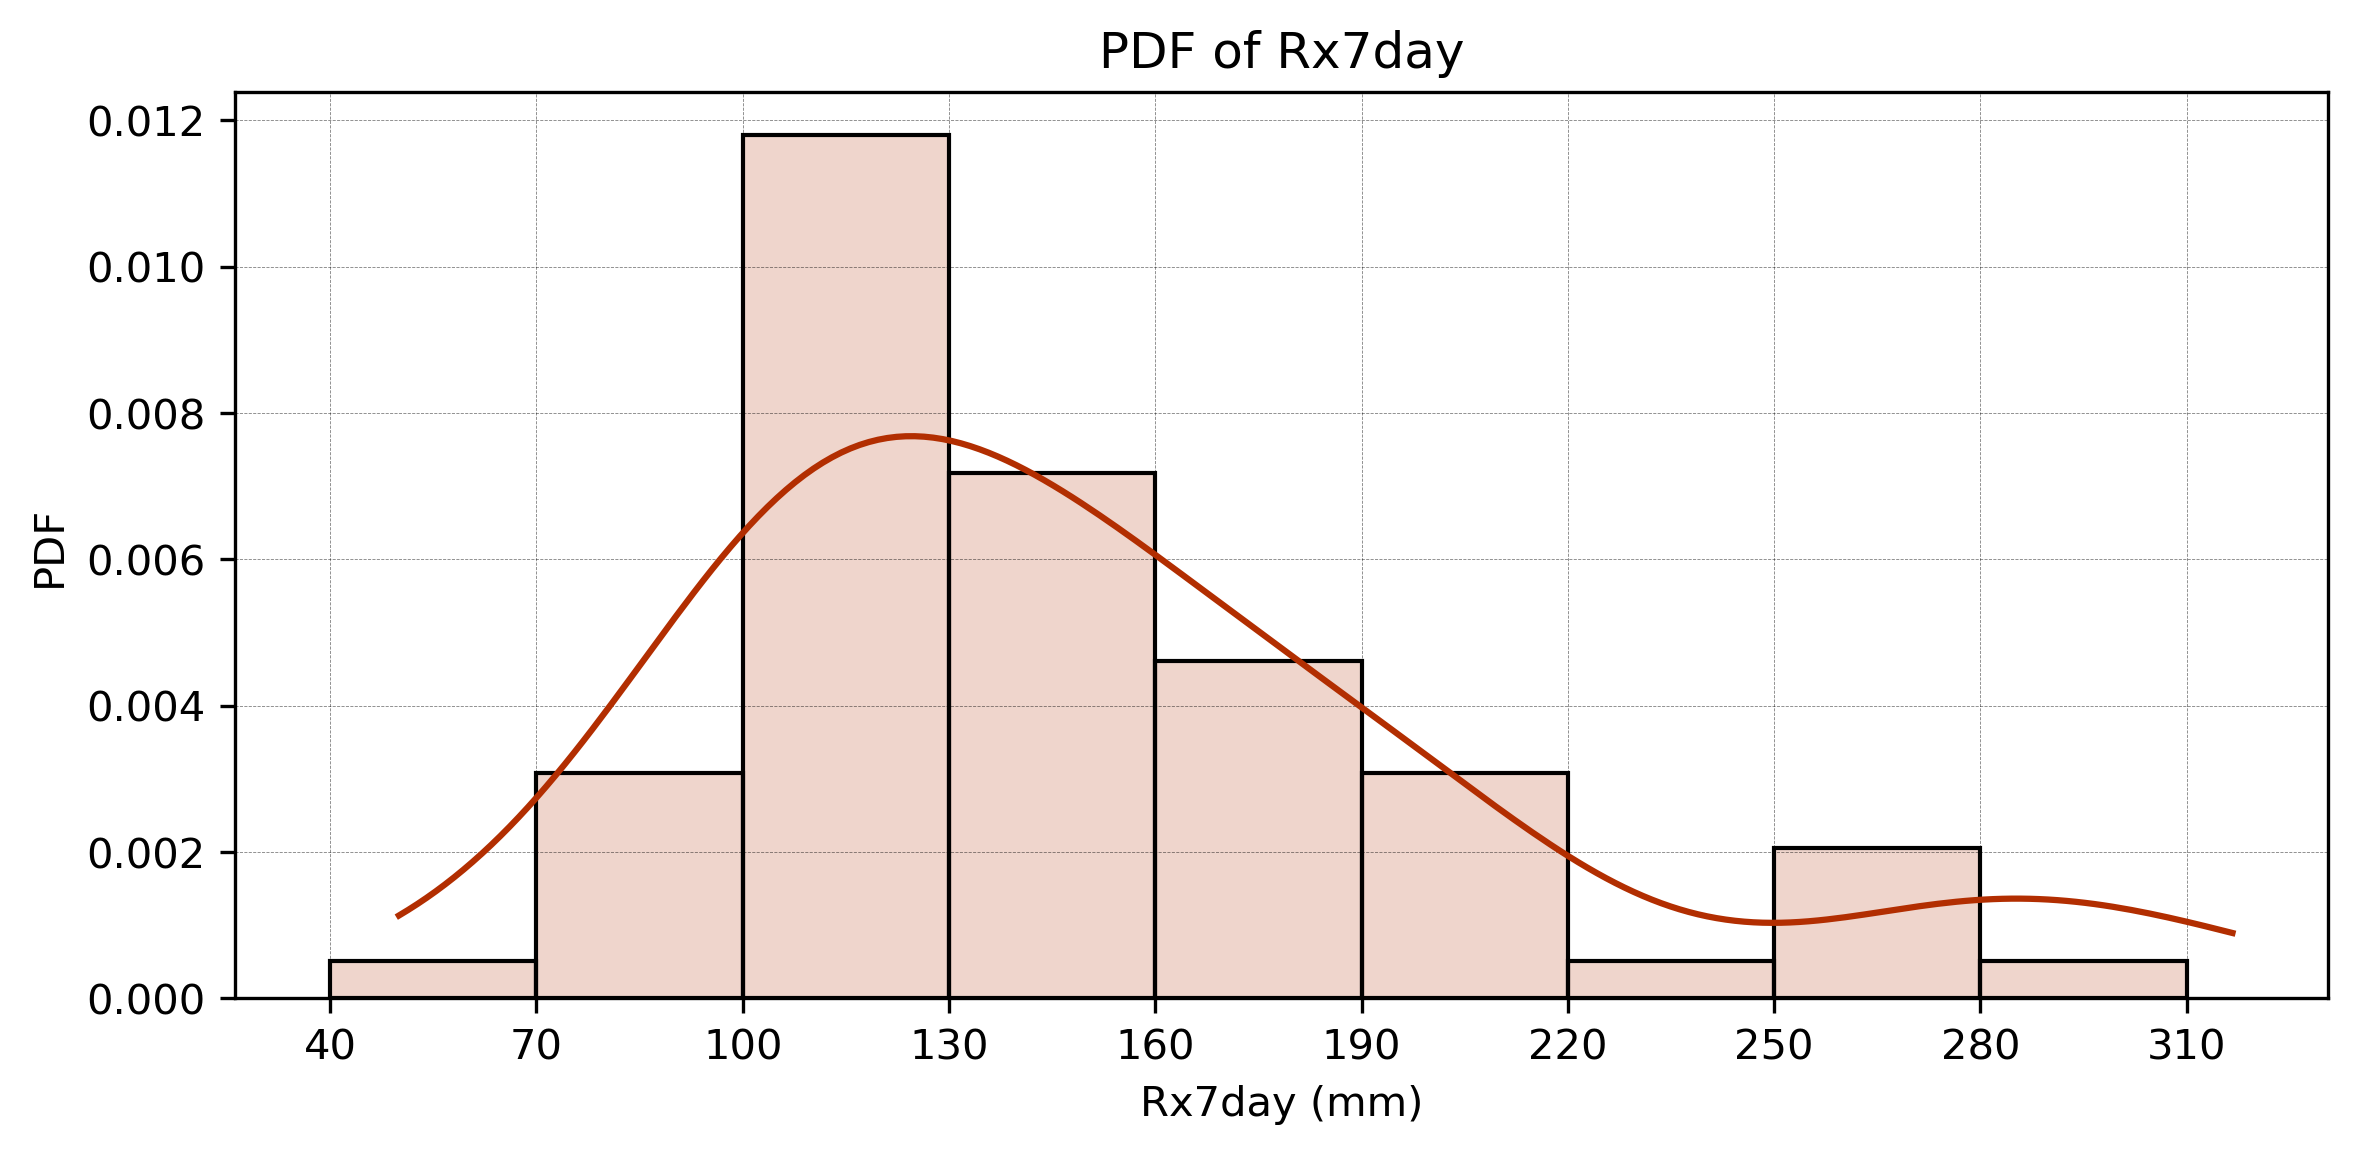

In [9]:
df = pd.read_csv('/home/data/Risser2019_Figure1.csv')

fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300)

bins = [40, 70, 100, 130, 160, 190, 220, 250, 280, 310, ]
sns.histplot(df[' Rx7day'], kde=True, color='#b22e01', bins=bins, alpha=0.2, stat='density')

ax.grid(linestyle='--', linewidth=0.2, alpha=0.5, color='k')
ax.set_title('PDF of Rx7day')
ax.set_xlabel('Rx7day (mm)')
ax.set_ylabel('PDF') 
ax.set_xticks(bins)

plt.show()

#### Start with the assumption that cμ = 0; guesstimate the values of μ0, σ, and ξ that approximately correspond to the data loaded above. A good starting point might be using the mean for μ0 and the standard deviation for σ. You’ll need to manually adjust the values to get this to work though. (Note: you should not do any optimization or fitting at this step. You will get no credit for this problem if you do.)

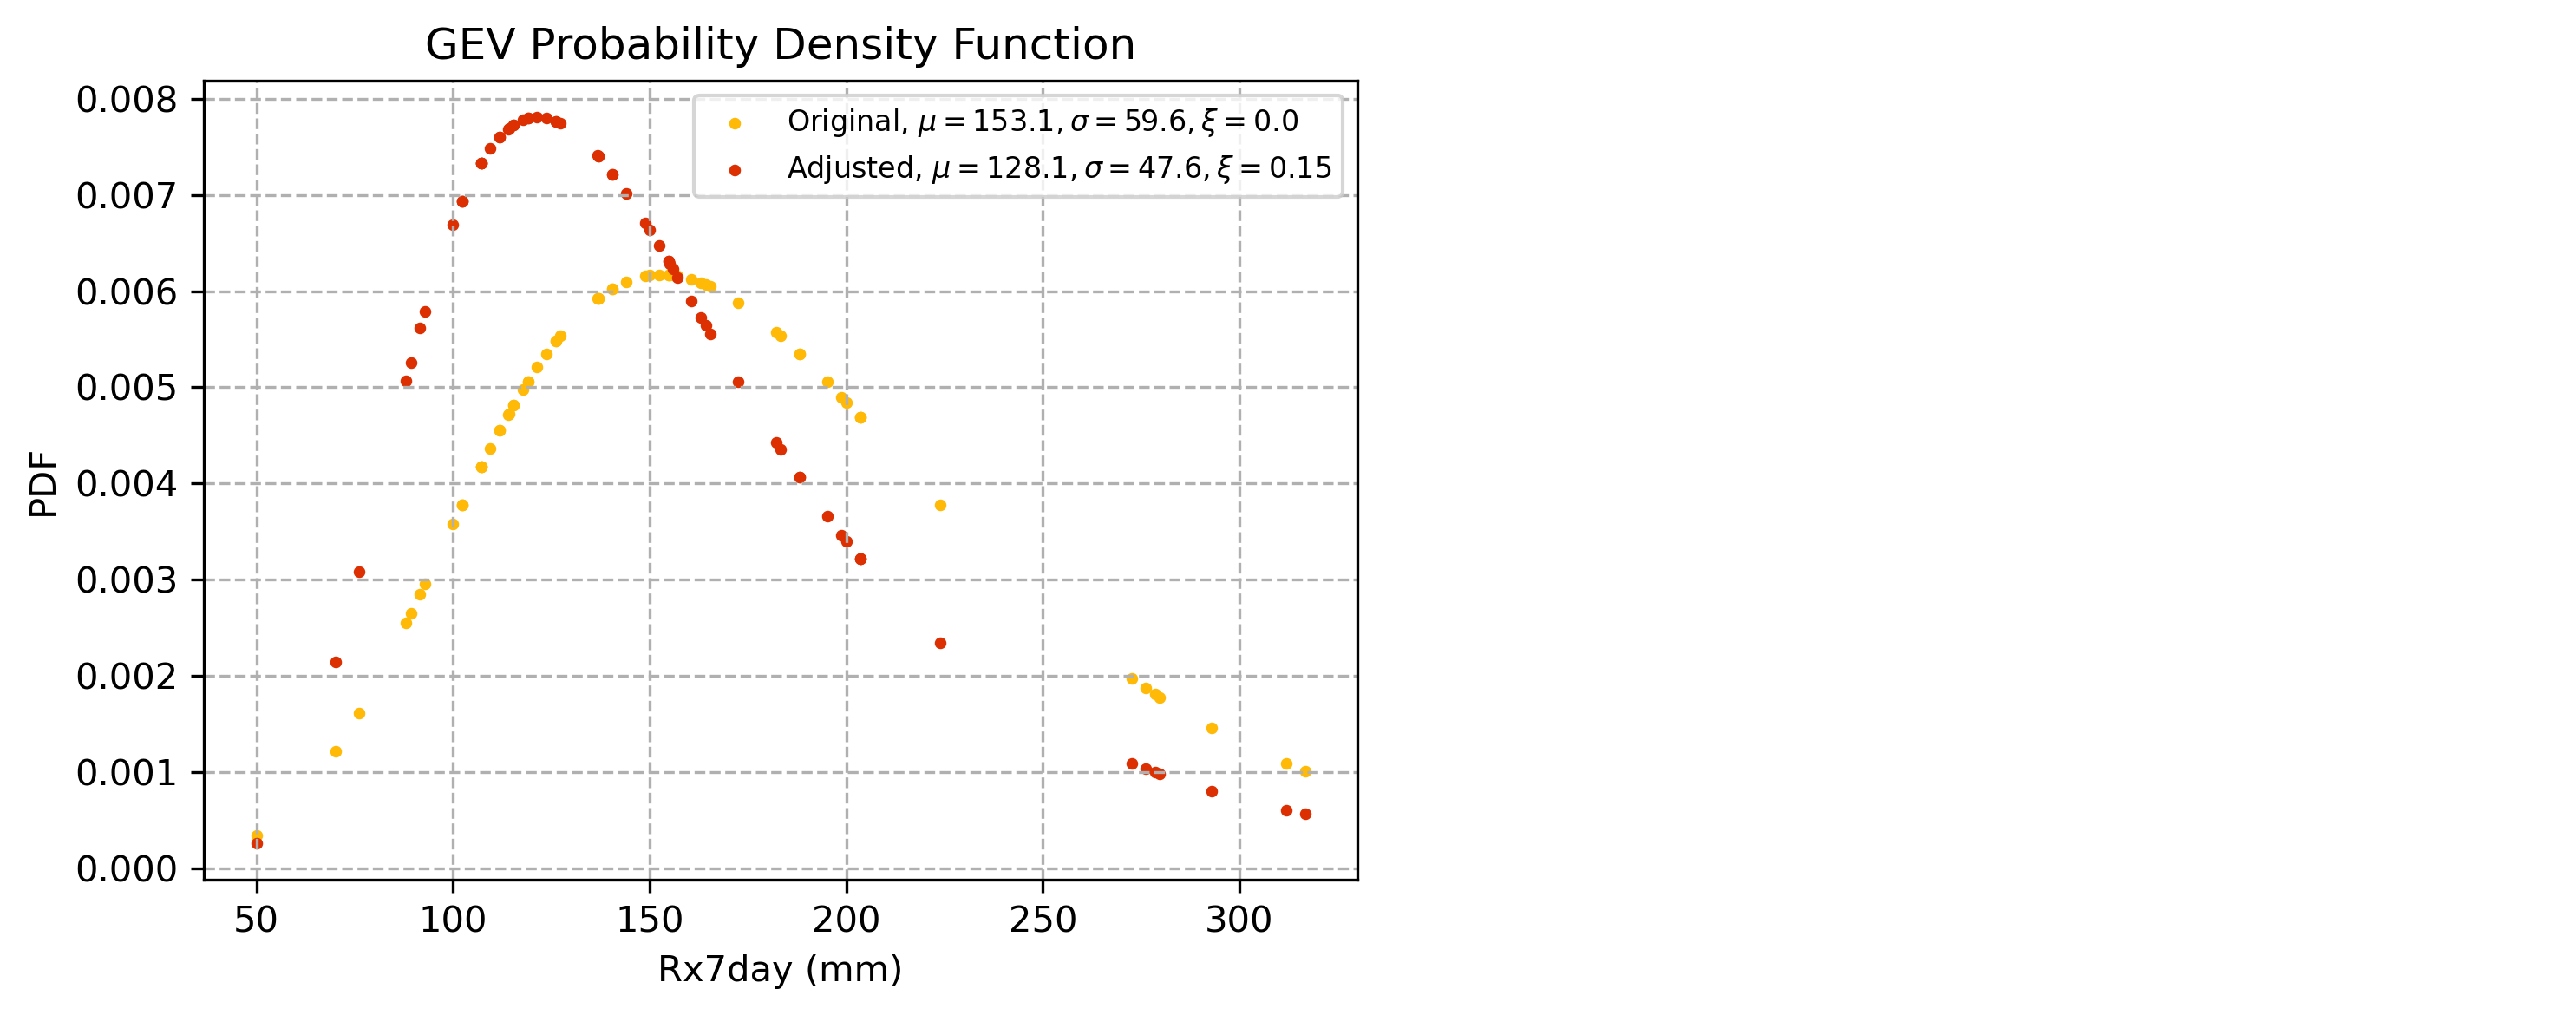

In [10]:
t = df['# Year']-1950 # Converted to 0-66 years
cmu = 0.0
mu0 = df[' Rx7day'].mean() 
sigma = df[' Rx7day'].std() 
xi = 0.0

pdf_values = gev_ns_pdf(df[' Rx7day'], t, cmu, mu0, sigma, xi)
pdf_values_adj = gev_ns_pdf(df[' Rx7day'], t, cmu, mu0-25, sigma-12, xi+0.15) # Calculate pdf


fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

ax[0].scatter(df[' Rx7day'], pdf_values, s=5, c='#ffba08', label=f"Original, $\\mu={mu0:.1f}, \\sigma={sigma:.1f}, \\xi={xi}$")
ax[0].grid(ls='--')
ax[0].set_title("GEV Probability Density Function")
ax[0].set_xlabel("Rx7day (mm)")
ax[0].set_ylabel("PDF")


ax[0].scatter(df[' Rx7day'], pdf_values_adj, s=5, c='#dc2f02', label=f"Adjusted, $\\mu={mu0-25:.1f}, \\sigma={sigma-12:.1f}, \\xi={xi+0.15}$")
ax[0].legend(loc=1, prop={'size': 8})
ax[1].axis('off')
plt.tight_layout()
plt.show()

#### Plot time vs Rx7day along with time t vs Q(q, t | cμ, μ0, σ, ξ) for q = 0.1, q = 0.5, and q = 0.9 (i.e., plot a timeseries of the quantiles using cμ and the values of μ0, σ, and ξ determined above.)

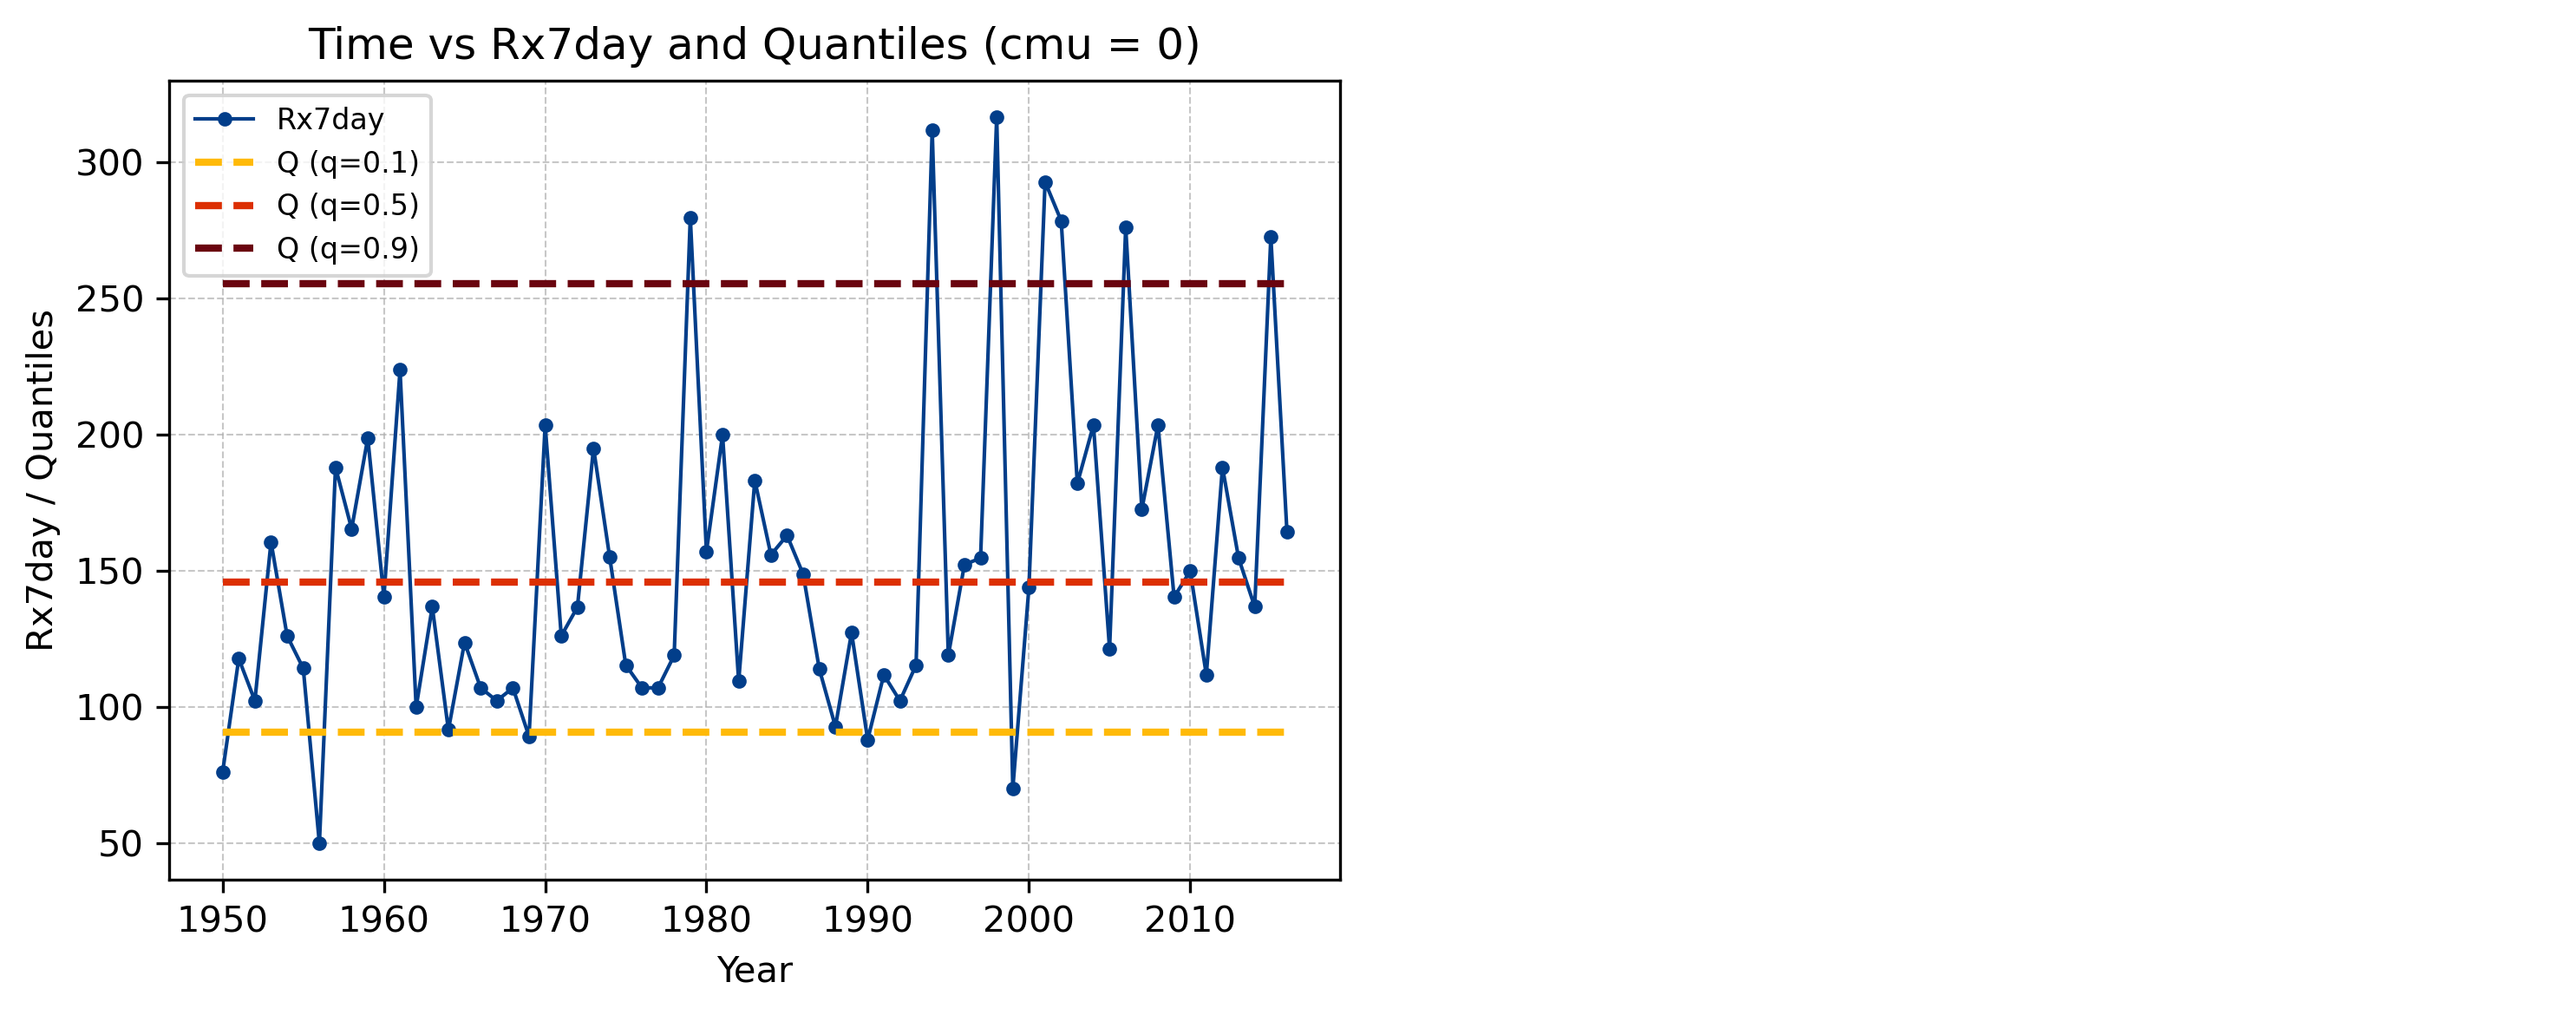

In [11]:
t = df['# Year']-1950 # Converted to 0-66 years
cmu = 0
mu0 = df[' Rx7day'].mean()-25
sigma = df[' Rx7day'].std()-12
xi = 0.0+0.15
q_values = [0.1, 0.5, 0.9] 

quantiles = {q: gev_ns_quantile(q, t, cmu, mu0, sigma, xi) for q in q_values} # Calculate quantiles


fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300) 
ax[0].plot(t, df[' Rx7day'], label="Rx7day", color='#023e8a', marker='o',ms=3,lw=1, linestyle='-')

colors = ['#ffba08', '#dc2f02', '#6a040f']
for i, q in enumerate(q_values):
    ax[0].plot(t, quantiles[q], label=f"Q (q={q})", color=colors[i],lw=2, linestyle='--')

ax[0].set_title("Time vs Rx7day and Quantiles (cmu = 0)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rx7day / Quantiles")
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax[0].legend(loc="upper left", prop={'size': 8})
ax[0].set_xticks(np.arange(0, 67, 10))  
ax[0].set_xticklabels(np.arange(1950, 2018, 10))  
ax[1].axis('off')
plt.tight_layout()
plt.show()


#### Generate a new plot similar to the above, but adjust cμ until your quantile functions above approximately go through the data. You may need to adjust the other parameters to get this to work well.

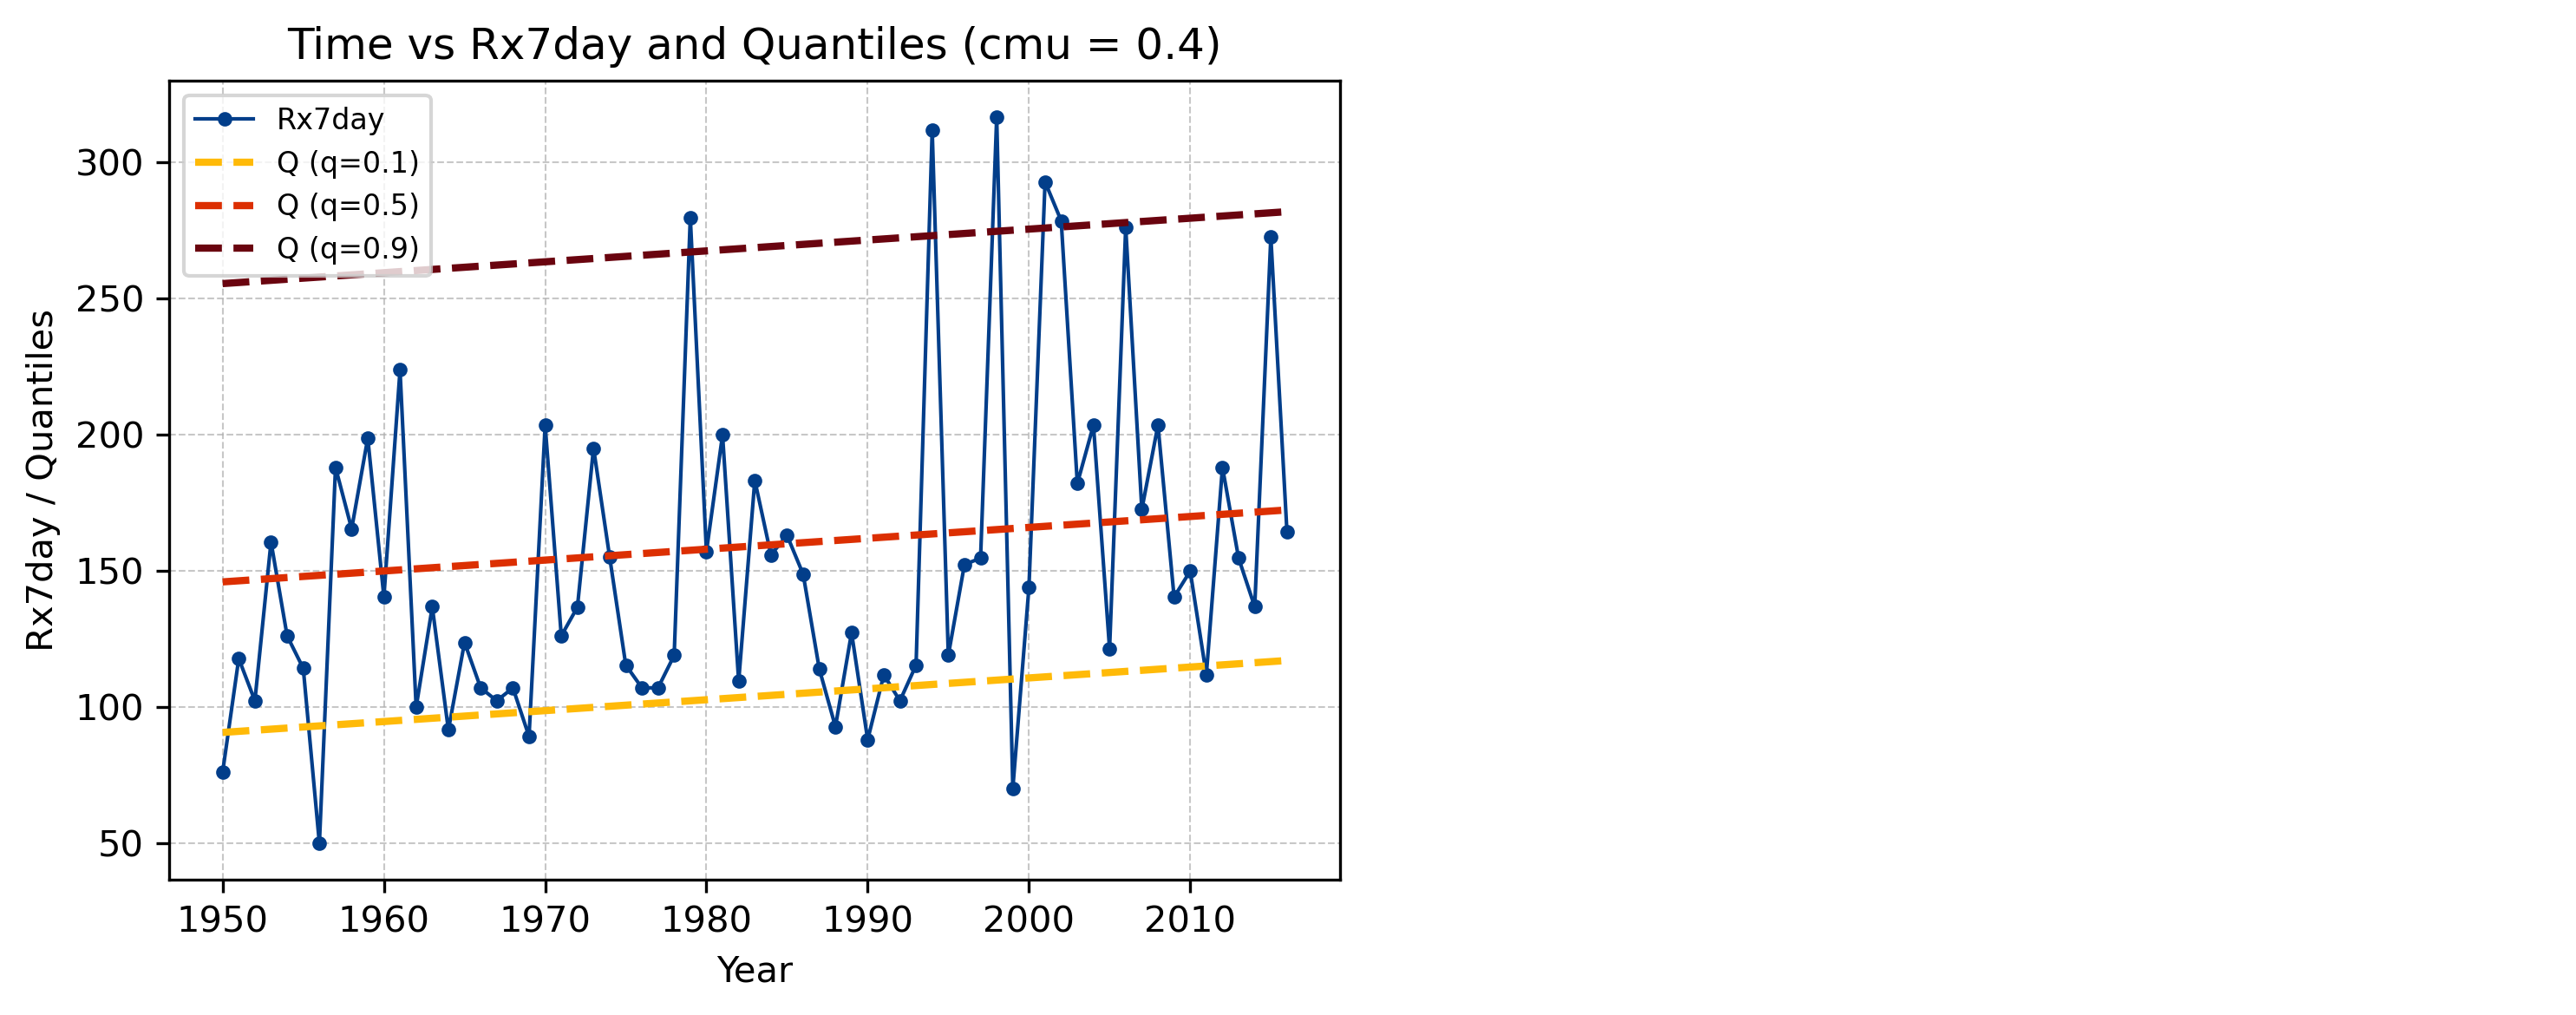

In [12]:
t = df['# Year']-1950 # Converted to 0-66 years
cmu = 0.4
mu0 = df[' Rx7day'].mean()-25
sigma = df[' Rx7day'].std()-12
xi = 0.0+0.15
q_values = [0.1, 0.5, 0.9] 

quantiles = {q: gev_ns_quantile(q, t, cmu, mu0, sigma, xi) for q in q_values} # Calculate quantiles


fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300) 
ax[0].plot(t, df[' Rx7day'], label="Rx7day", color='#023e8a', marker='o',ms=3,lw=1, linestyle='-')

colors = ['#ffba08', '#dc2f02', '#6a040f']
for i, q in enumerate(q_values):
    ax[0].plot(t, quantiles[q], label=f"Q (q={q})", color=colors[i],lw=2, linestyle='--')

ax[0].set_title("Time vs Rx7day and Quantiles (cmu = 0.4)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rx7day / Quantiles")
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax[0].legend(loc="upper left", prop={'size': 8})
ax[0].set_xticks(np.arange(0, 67, 10))  
ax[0].set_xticklabels(np.arange(1950, 2018, 10))  
ax[1].axis('off')
plt.tight_layout()
plt.show()

#### Calculate the percentage change in μ(t) between 1950 and 2017. How does this compare to the values reported in Table 1 of Risser et al., and why might it differ?

In [13]:
# Calculate μ(t) for 1950 and 2017
mu_1950 = cmu + mu0
mu_2017 = cmu * 68+ mu0 # 68 represents 68 years from 1950 to 2017

# Calculate the percentage change
percentage_change = ((mu_2017 - mu_1950) / mu_1950) * 100
print(f"Percentage Change in μ(t) between 1950 and 2017: {percentage_change:.2f}%")


Percentage Change in μ(t) between 1950 and 2017: 20.86%


Based on the results of Wisser et al., the change in precipitation for the larger region was around 23.6-23.7%, while for the smaller region, it was 37.7%. Therefore, my result (20.86%) underestimates the findings of Wisser et al. for both the larger and smaller regions.

- My result was derived using a non-stationary generalized extreme value (GEV) distribution model, where parameters such as *cmu* and *mu0* were estimated based on historical data. This means the model is built on the assumed long-term trends and specific time parameters (i.e., changes from 1950 to 2016), rather than actual 2017 data. In contrast, Wisser et al. used real precipitation data from 2017, particularly from Hurricane Harvey, to calculate the impact of climate change on precipitation. Actual observed data better capture the characteristics of extreme events, whereas models may smooth out some of these extreme phenomena.

- Wisser et al.'s study specifically addresses precipitation changes under climate change, especially extreme events like Hurricane Harvey, which had extremely high rainfall. While the GEV model I used can describe extreme values, it relies on historical trends and parameter estimates, which might not fully capture the magnitude of such extreme events. As a result, my results underestimate the changes observed in reality.

# 6. Maximum likelihood (+20 extra credit)

#### Use an automated method to find maximum likelihood estimates of cμ, μ0, σ, and ξ (e.g., gradient descent). Discuss how these estimates compare with your manual estimates above.

##### Likelihood function

The likelihood function can be expressed as:

$$
L(\text{cmu}, \mu_0, \sigma, \xi \mid x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi)
$$

##### Log-likelihood function

Then, the log-likelihood function can be written as:

$$
\ln L(\text{cmu}, \mu_0, \sigma, \xi \mid x_1, x_2, \ldots, x_n) = \ln \left( \prod_{i=1}^{n} f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi) \right)
$$

Using the properties of logarithms, we get:

$$
\ln L(\text{cmu}, \mu_0, \sigma, \xi \mid x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n} \ln f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi)
$$

So calculating the maximum likelihood is to calculate the parameters $(\text{cmu}, \mu_0, \sigma, \xi)$ when $\sum_{i=1}^{n} \ln f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi)$ is the maximum value.

Since most optimization algorithms (such as gradient descent) are designed to find minima, the objective function is formulated in a way that needs to be minimized. Thus, the negative log-likelihood function is chosen for minimization.

In [14]:
import numpy as np

def neg_log_likelihood(params, x, t):
    """ 
    Negative log-likelihood for non-stationary GEV without using genextreme.
    
    Parameters:
    params : array-like, contains the GEV parameters [xi, mu0, cmu, sigma].
    x : array-like, the observed data.
    t : array-like, the time variable corresponding to each observation in x.

    Returns:
    neg_log_lik : float, the negative log-likelihood of the GEV parameters given the data.
    """
    xi, mu0, cmu, sigma = params
    mu_t = mu0 + cmu * t  # Time-varying location parameter
    
    # Ensure scale (sigma) is positive
    if sigma <= 0:
        return np.inf

    # Calculate t(x) = 1 + xi * (x - mu_t) / sigma
    t_x = 1 + xi * (x - mu_t) / sigma
    
    # Check for invalid values (where t(x) <= 0, the PDF is undefined)
    if np.any(t_x <= 0):
        return np.inf

    # Calculate the log-likelihood
    if xi != 0:
        # General case for non-zero shape parameter (xi != 0)
        log_pdf = -np.log(sigma) - (1 / xi + 1) * np.log(t_x) - t_x ** (-1 / xi)
    else:
        # Special case for zero shape parameter (Gumbel distribution)
        log_pdf = -np.log(sigma) - (x - mu_t) / sigma - np.exp(-(x - mu_t) / sigma)
    
    # Negative log-likelihood
    neg_log_lik = -np.sum(log_pdf)
    
    return neg_log_lik


Use the `minimize` function from the `scipy.optimize` library to implement gradient descent or other optimization algorithms.

In [15]:
initial_params = [0.1, np.mean(df[' Rx7day'].values), 1, np.std(df[' Rx7day'].values)]
result = minimize(neg_log_likelihood, initial_params, args=(df[' Rx7day'].values, df['# Year']-1950))

In [16]:
print("Fitted GEV Parameters:")
print("xi =", result.x[0])
print("mu0 =", result.x[1])
print("cmu =", result.x[2])
print("sigma =", result.x[3])

Fitted GEV Parameters:
xi = 0.06349744136699316
mu0 = 103.38385690199793
cmu = 0.7113786165665916
sigma = 40.55389736276445


The adjusted GEV parameters:𝜉=0.06, 𝜇0=103.4, cmu=0.7, 𝜎=40.5. The fitted GEV parameters can be seen in the previous line of code.


- Trend Changes: The fitted cmu being a positive value may indicate that the extremity of events has increased during the analyzed time period. This aligns with current mainstream research findings, such as those by Risser et al.

- Change in Location Parameter: The fitted 𝜇0 is significantly lower than the manually estimated value. This change suggests that the threshold for extreme events has been lowered in the fitted model, meaning that the expected extreme values are now lower than those predicted by the original data.

- Reduction in Scale Parameter: The reduction in the scale parameter indicates a decrease in the variability of extreme values. This means that the fitted model predicts a narrower range of extreme events, reflecting a higher concentration of the distribution around the mean.

- Shape Parameter: The positive value of ξ indicates a heavy-tailed distribution. The fitted ξ is 0.06, significantly lower than the estimated value of 0.15. This decrease suggests a shift toward a light-tailed distribution, implying that the probability of extreme values occurring is lower than initially anticipated in the estimated value.

By comparing the PDF of the fitted GEV parameters with the manually estimated GEV PDF, it is easy to observe the above patterns


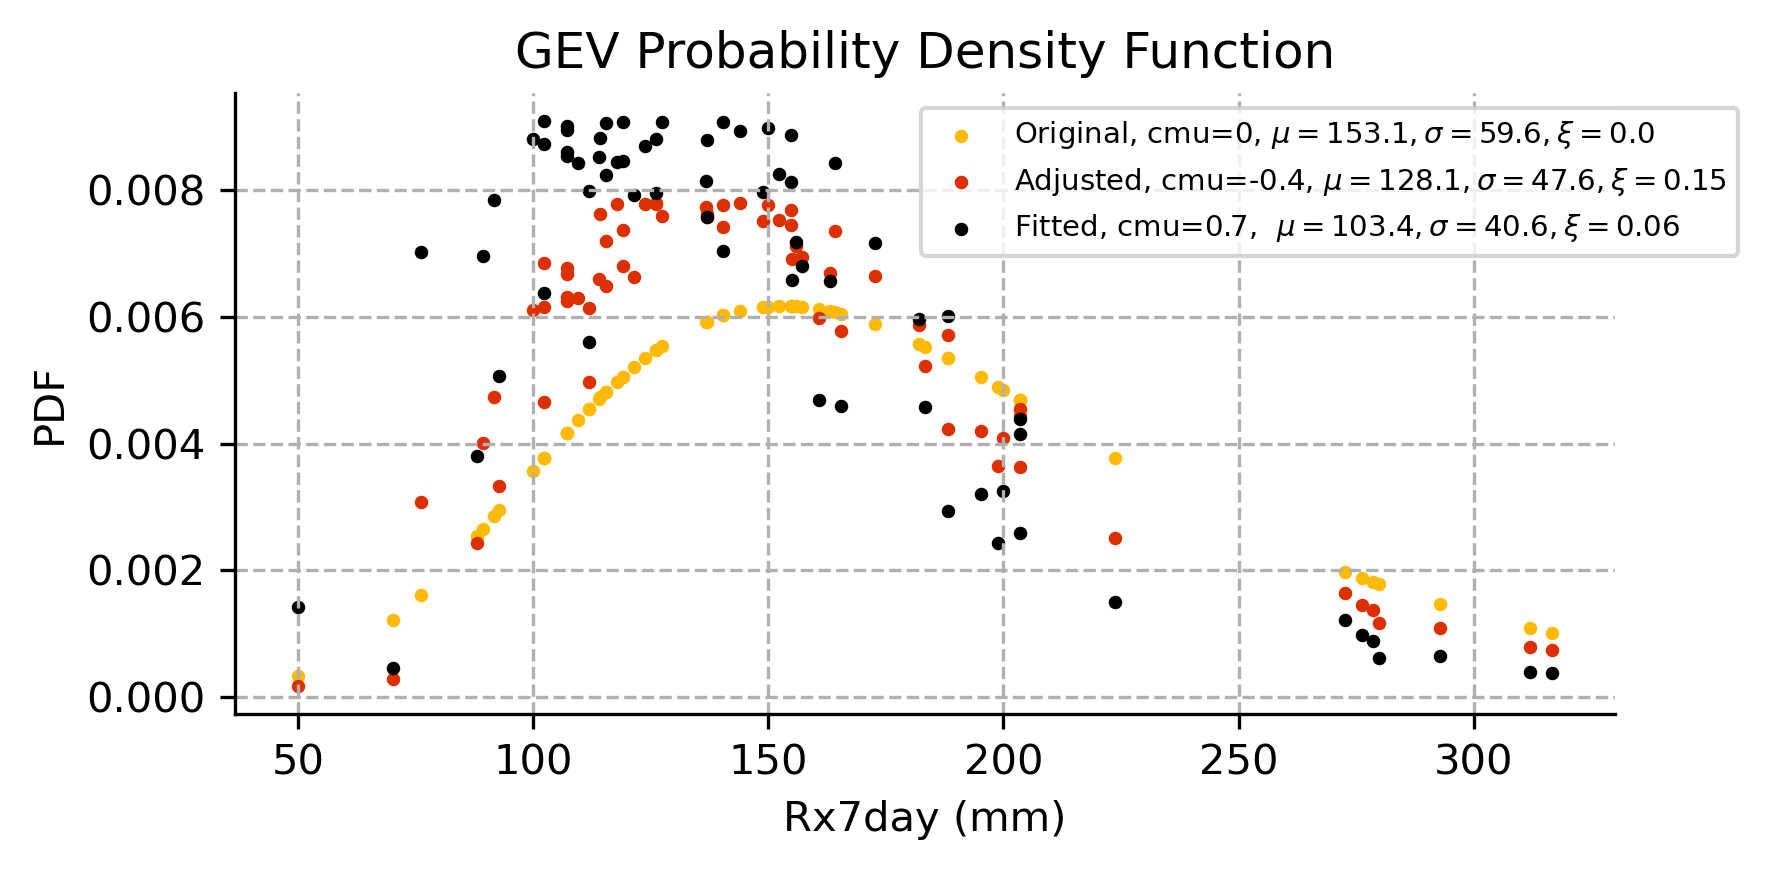

In [17]:
t = df['# Year']-1950 # Converted to 0-66 years
cmu = 0
mu0 = df[' Rx7day'].mean() 
sigma = df[' Rx7day'].std() 
xi = 0.0

pdf_values = gev_ns_pdf(df[' Rx7day'], t, cmu, mu0, sigma, xi)
pdf_values_adj = gev_ns_pdf(df[' Rx7day'], t, cmu+0.4, mu0-25, sigma-12, xi+0.15) # Calculate pdf
pdf_values_fitted = gev_ns_pdf(df[' Rx7day'], t, result.x[2], result.x[1], result.x[3], result.x[0]) # Calculate pdf

fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)

ax.scatter(df[' Rx7day'], pdf_values, s=5, c='#ffba08', label=f"Original, cmu={cmu}, $\\mu={mu0:.1f}, \\sigma={sigma:.1f}, \\xi={xi}$")
ax.grid(ls='--')
ax.set_title("GEV Probability Density Function")
ax.set_xlabel("Rx7day (mm)")
ax.set_ylabel("PDF")


ax.scatter(df[' Rx7day'], pdf_values_adj, s=5, c='#dc2f02', label=f"Adjusted, cmu={cmu-0.4}, $ \\mu={mu0-25:.1f}, \\sigma={sigma-12:.1f}, \\xi={xi+0.15}$")
ax.scatter(df[' Rx7day'], pdf_values_fitted, s=5, c='k', label=f"Fitted, cmu={result.x[2]:.1f},  $ \\mu={result.x[1]:.1f}, \\sigma={result.x[3]:.1f}, \\xi={result.x[0]:.2f}$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc=1, prop={'size': 7}, bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

The following chart calculates the change in quantiles of Rx7day over time using fitted parameters. Different quantiles have increased over time, which is consistent with most current research findings that extreme precipitation events are becoming more frequent and intense in recent years.

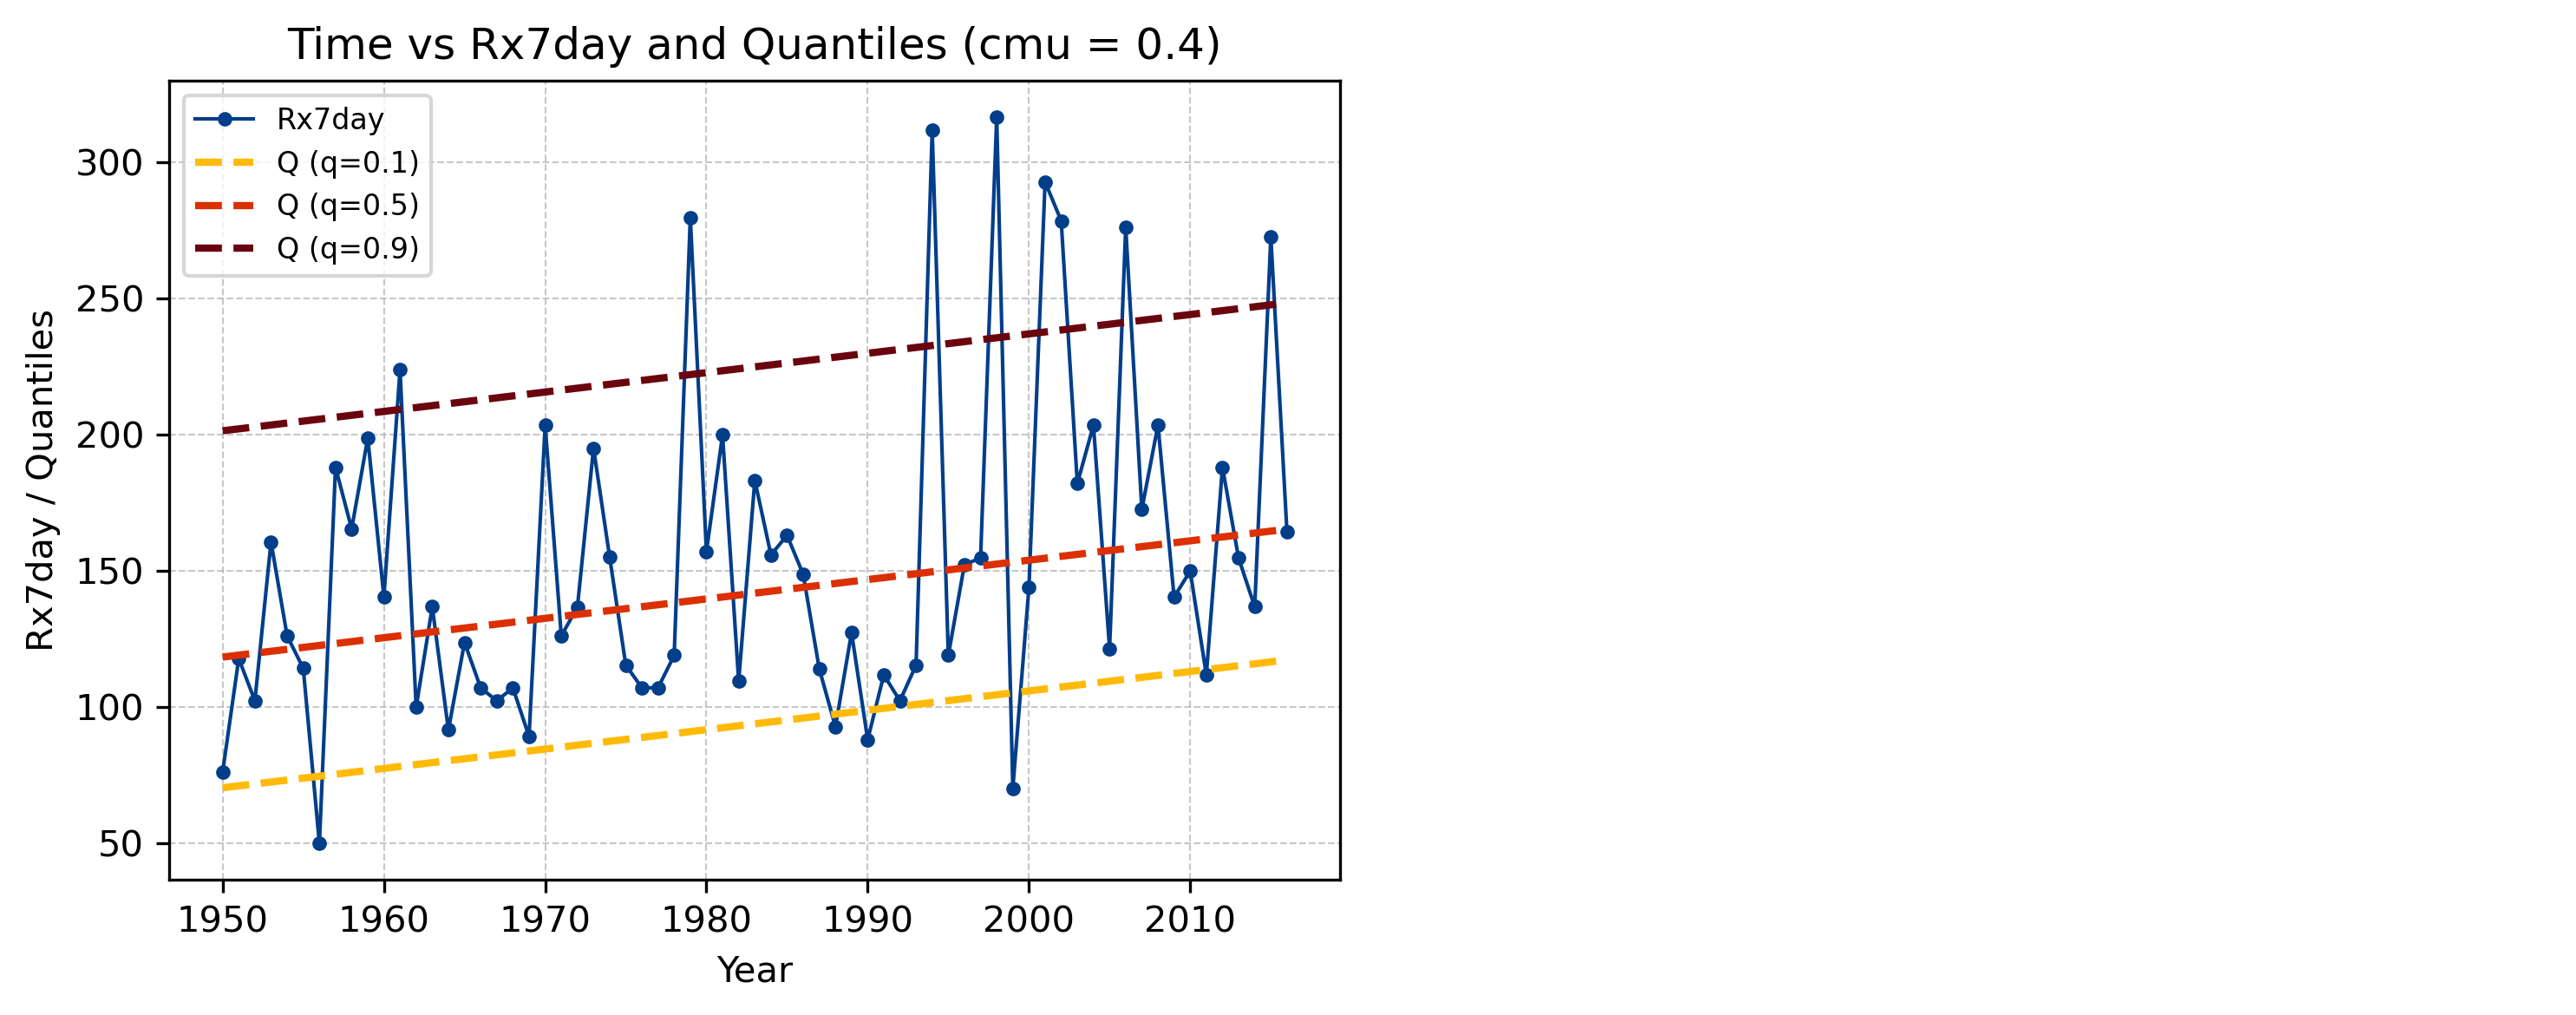

In [18]:
t = df['# Year']-1950 # Converted to 0-66 years
cmu = 0.4
mu0 = df[' Rx7day'].mean()-25
sigma = df[' Rx7day'].std()-12
xi = 0.0+0.15
q_values = [0.1, 0.5, 0.9] 

quantiles = {q: gev_ns_quantile(q, t, result.x[2], result.x[1], result.x[3], result.x[0]) for q in q_values} # Calculate quantiles


fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300) 
ax[0].plot(t, df[' Rx7day'], label="Rx7day", color='#023e8a', marker='o',ms=3,lw=1, linestyle='-')

colors = ['#ffba08', '#dc2f02', '#6a040f']
for i, q in enumerate(q_values):
    ax[0].plot(t, quantiles[q], label=f"Q (q={q})", color=colors[i],lw=2, linestyle='--')

ax[0].set_title("Time vs Rx7day and Quantiles (cmu = 0.4)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rx7day / Quantiles")
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax[0].legend(loc="upper left", prop={'size': 8})
ax[0].set_xticks(np.arange(0, 67, 10))  
ax[0].set_xticklabels(np.arange(1950, 2018, 10))  
ax[1].axis('off')
plt.tight_layout()
plt.show()